<a href="https://www.kaggle.com/code/nabilsherif/laptops-price-predictions?scriptVersionId=127240294" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# By: `Nabil Sherif Nabil Ibrahim Darwish`

# Data analysis and preprocessing

## 1- imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## 2- Load Data

In [2]:
df = pd.read_csv('/kaggle/input/laptop-price-prediction/laptops_train.csv')
df_test = pd.read_csv('/kaggle/input/laptop-price-prediction/laptops_test.csv')

In [3]:
df.shape

(977, 13)

In [4]:
df = pd.concat([df, df_test])

In [5]:
df.shape

(1302, 13)

In [6]:
df.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', ' Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price'],
      dtype='object')

### Renaming the columns

In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [8]:
df.columns

Index(['manufacturer', 'model_name', 'category', 'screen_size', 'screen',
       'cpu', 'ram', '_storage', 'gpu', 'operating_system',
       'operating_system_version', 'weight', 'price'],
      dtype='object')

In [9]:
df.head()

,manufacturer,model_name,category,screen_size,screen,cpu,ram,_storage,gpu,operating_system,operating_system_version,weight,price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


## 3- Data Understanding

In [10]:
df.shape

(1302, 13)

In [11]:
df.dtypes

manufacturer                 object
model_name                   object
category                     object
screen_size                  object
screen                       object
cpu                          object
ram                          object
_storage                     object
gpu                          object
operating_system             object
operating_system_version     object
weight                       object
price                       float64
dtype: object

price description

In [12]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
price,1302.0,9987212.68,6215745.9,1547208.0,5326308.0,8687484.0,13211978.13,54232308.0


Let's take a look at the unique value of each column 

In [13]:
for col in df.columns:
    print(col)
    print(f'first five unique values: {df[col].unique()[0:5]}')
    print(f'Number of unique values: {df[col].nunique()}\n')

manufacturer
first five unique values: ['Apple' 'HP' 'Acer' 'Asus' 'Dell']
Number of unique values: 19

model_name
first five unique values: ['MacBook Pro' 'Macbook Air' '250 G6' 'Aspire 3' 'ZenBook UX430UN']
Number of unique values: 617

category
first five unique values: ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible']
Number of unique values: 6

screen_size
first five unique values: ['13.3"' '15.6"' '15.4"' '14.0"' '12.0"']
Number of unique values: 18

screen
first five unique values: ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768']
Number of unique values: 40

cpu
first five unique values: ['Intel Core i5 2.3GHz' 'Intel Core i5 1.8GHz'
 'Intel Core i5 7200U 2.5GHz' 'Intel Core i7 2.7GHz'
 'Intel Core i5 3.1GHz']
Number of unique values: 118

ram
first five unique values: ['8GB' '16GB' '4GB' '2GB' '12GB']
Number of unique values: 9

_storage
first five unique values: ['128GB SSD' '128GB Flash Stora

## 4- Handling missing values

In [14]:
df.isna().sum()

manufacturer                  0
model_name                    0
category                      0
screen_size                   0
screen                        0
cpu                           0
ram                           0
_storage                      0
gpu                           0
operating_system              0
operating_system_version    170
weight                        0
price                         0
dtype: int64

we have 170 missing values in `Operating System version`

### Handling operating_system_version missing data

<AxesSubplot:xlabel='operating_system_version', ylabel='count'>

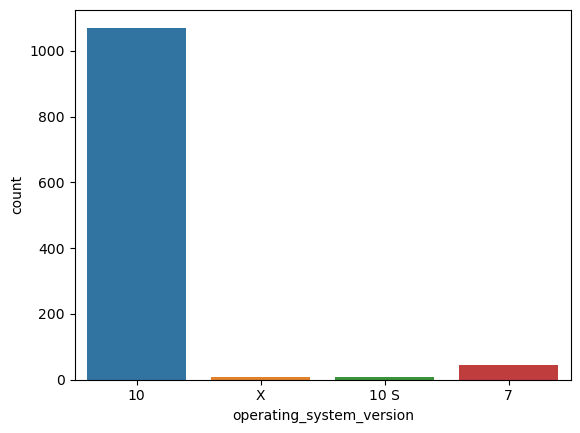

In [15]:
sns.countplot(data=df, x="operating_system_version")

#### we will fill the missing data with the mode since it's categorical

In [16]:
df['operating_system_version']=df['operating_system_version'].fillna(df['operating_system_version'].mode()[0])

In [17]:
df['operating_system_version'].isna().sum()

0

<AxesSubplot:xlabel='operating_system_version', ylabel='count'>

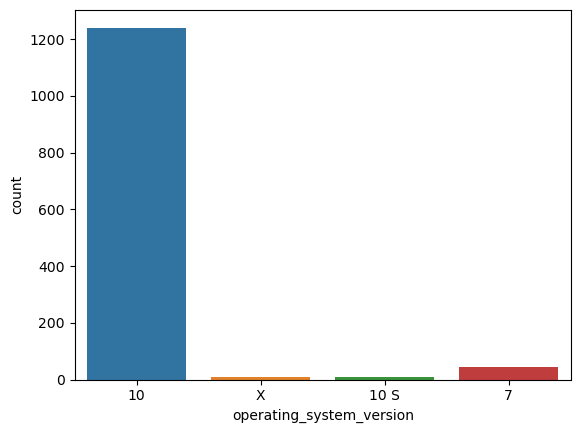

In [18]:
sns.countplot(data=df, x="operating_system_version")

## 5- Data Analysis

### since the weight coulmn object we will remove the 'kg' to make it numerical

In [19]:
df['weight'].replace(to_replace='kg', value='', regex=True, inplace=True)
df['weight'].replace(to_replace='s', value='', regex=True, inplace=True)

In [20]:
df['weight'] = df['weight'].astype("float64")

In [21]:
df.dtypes

manufacturer                 object
model_name                   object
category                     object
screen_size                  object
screen                       object
cpu                          object
ram                          object
_storage                     object
gpu                          object
operating_system             object
operating_system_version     object
weight                      float64
price                       float64
dtype: object

### Let's visualise Feature vs price

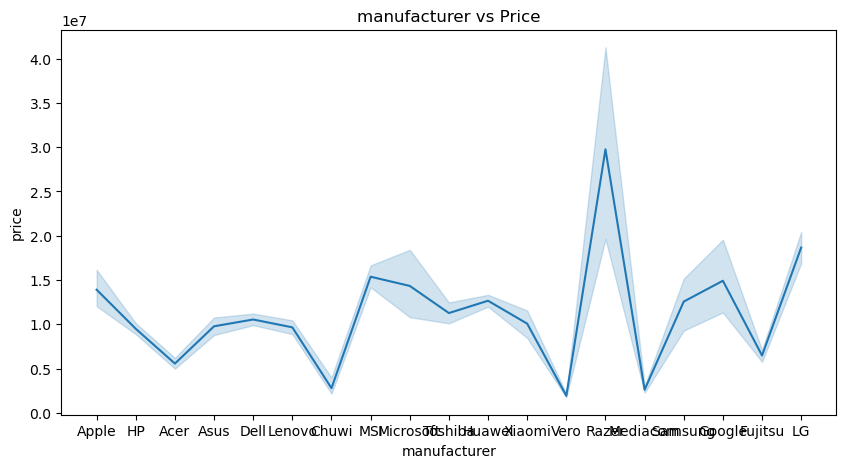

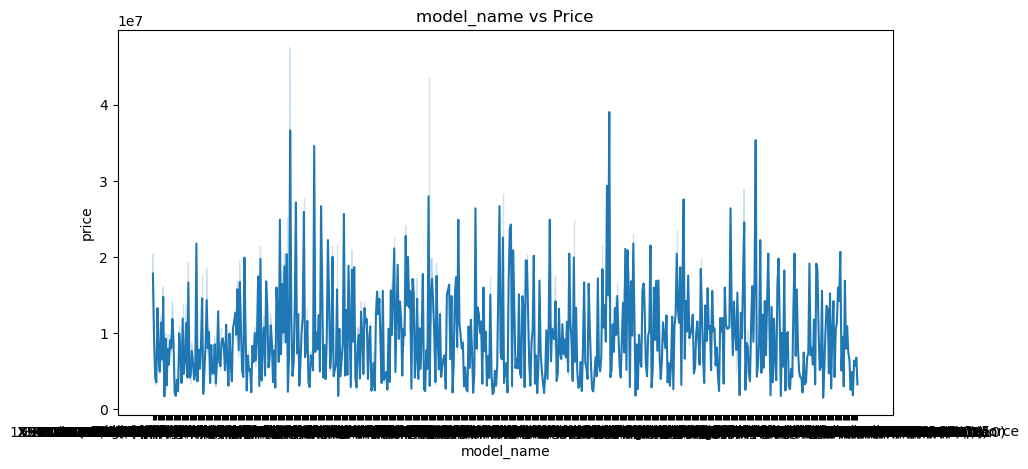

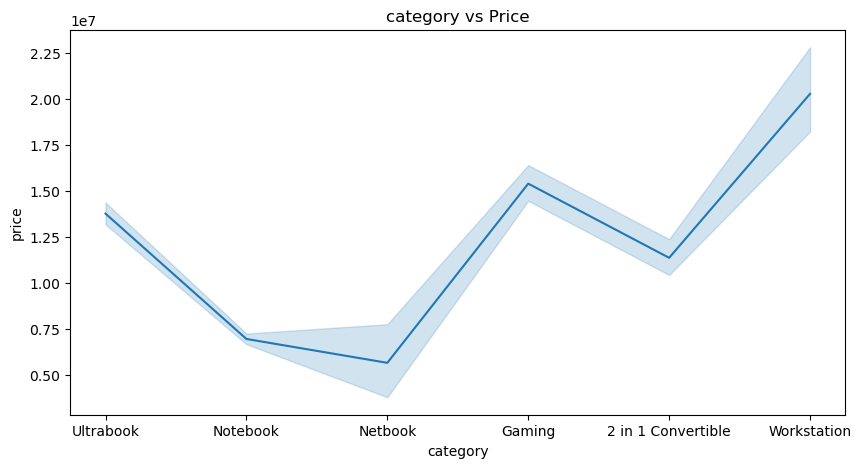

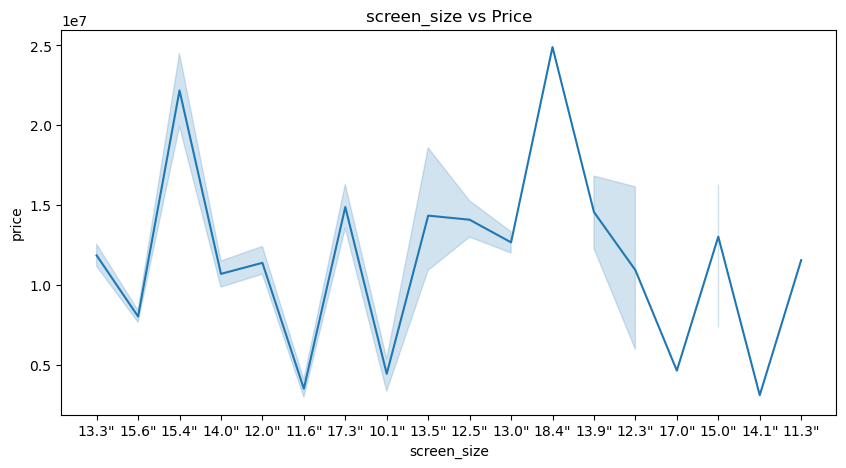

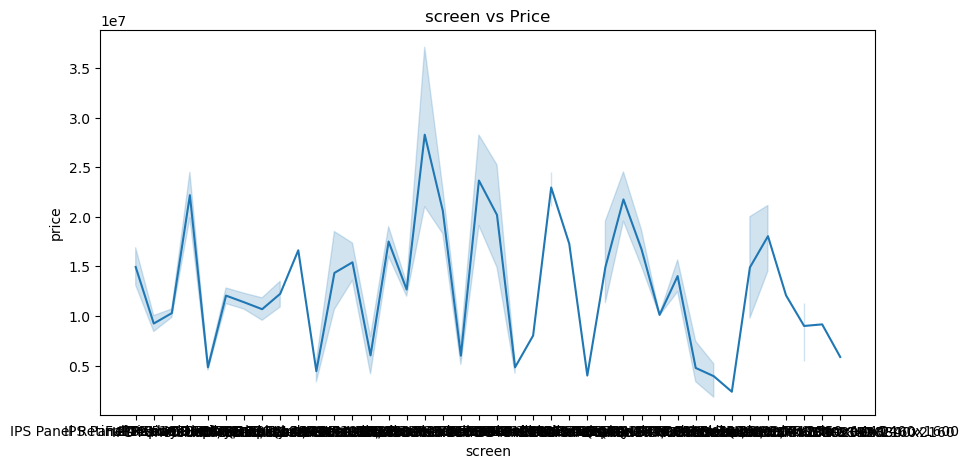

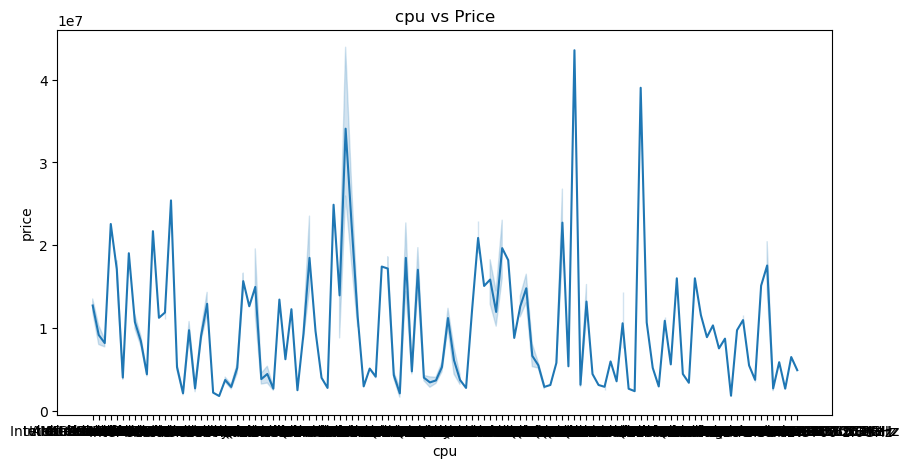

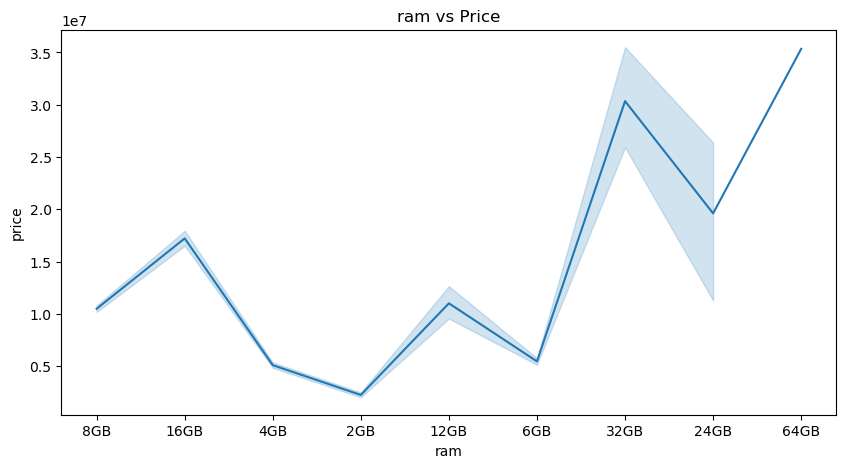

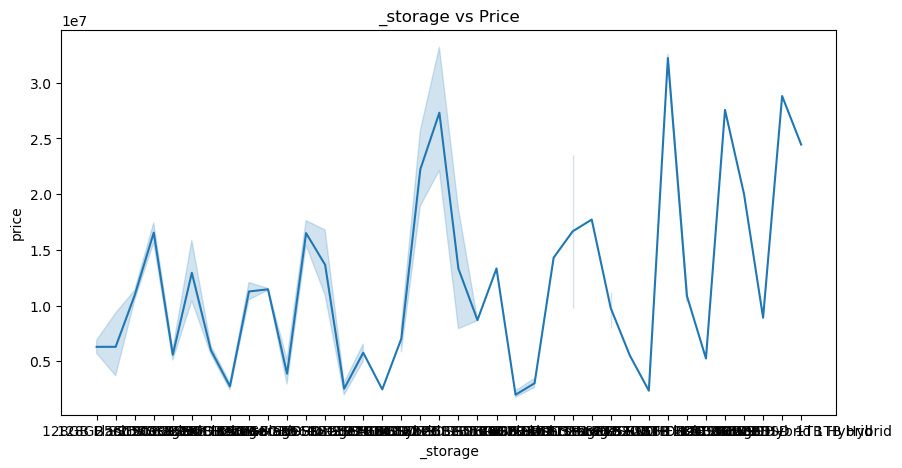

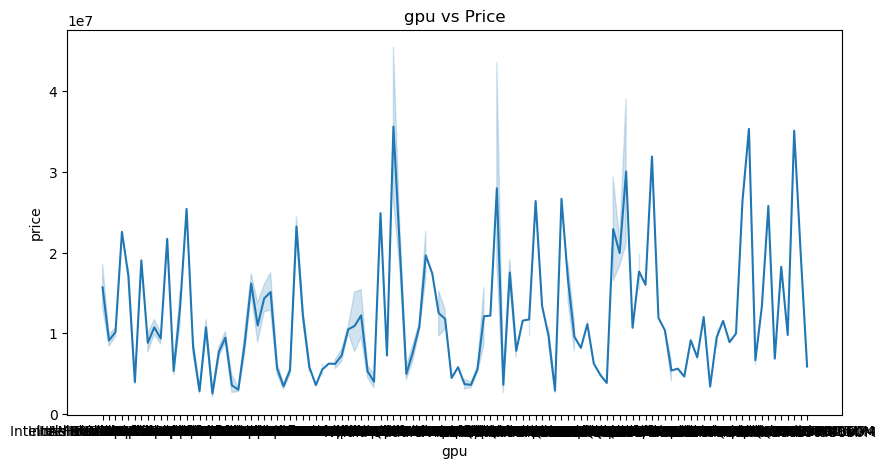

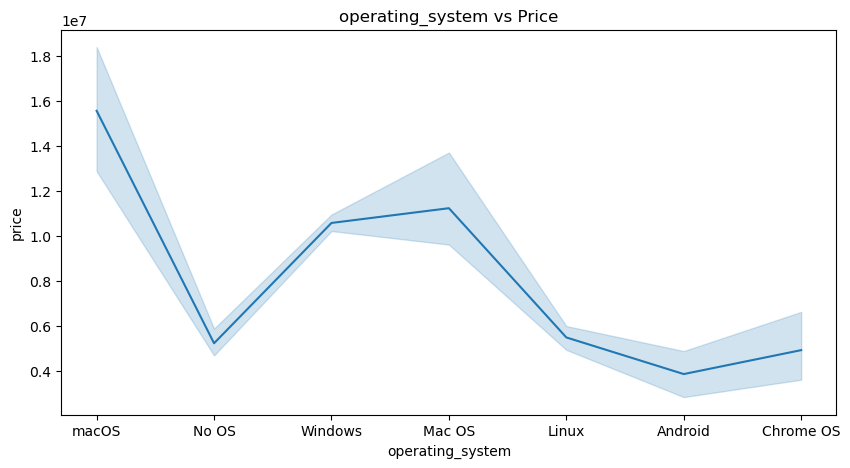

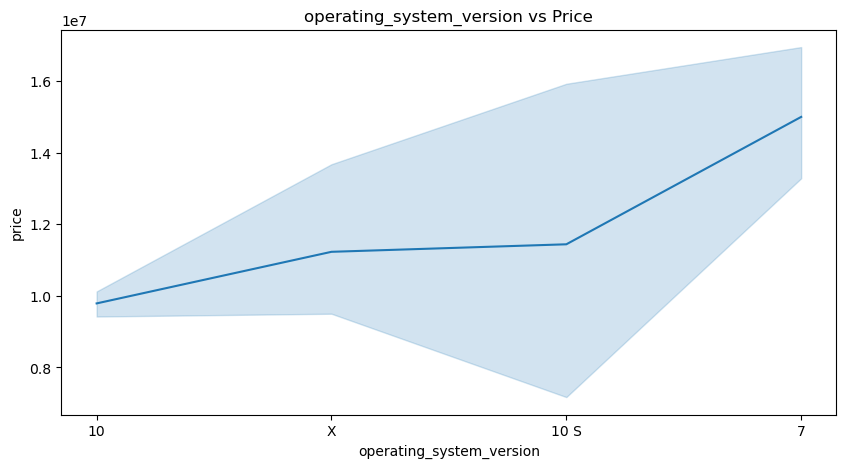

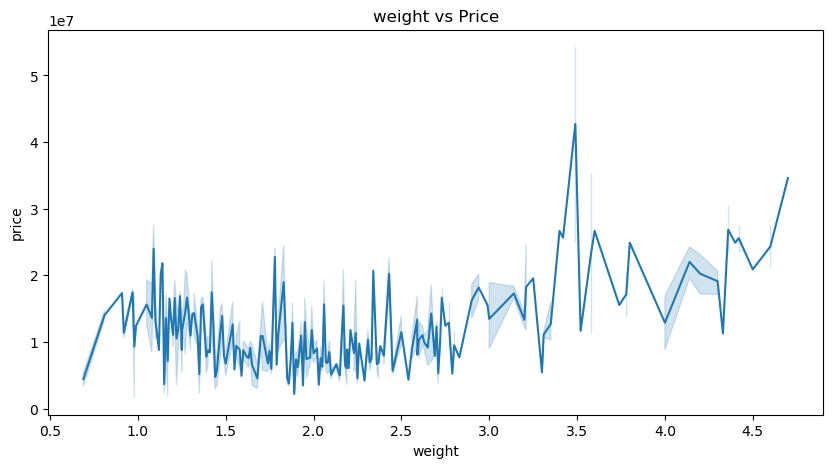

In [22]:
for col in df.columns:
    if col != 'price':
        fig, ax = plt.subplots(figsize=(10, 5))
        plt.title(f'{col} vs Price')
        sns.lineplot(data=df, x=col, y=df['price'])

In [23]:
df.corr()['price']

weight    0.210166
price     1.000000
Name: price, dtype: float64

`This means that there is no correlation between weight and price`

### Let's see which feature has more dominance in the data
### We will look at these 6 features:
### 1- Category
### 2- ram
### 3- operating_system
### 4- operating_system_version
### 5- manufuturer
### 6- screen_size

<AxesSubplot:title={'center':'operating_system_version'}, xlabel='operating_system_version', ylabel='count'>

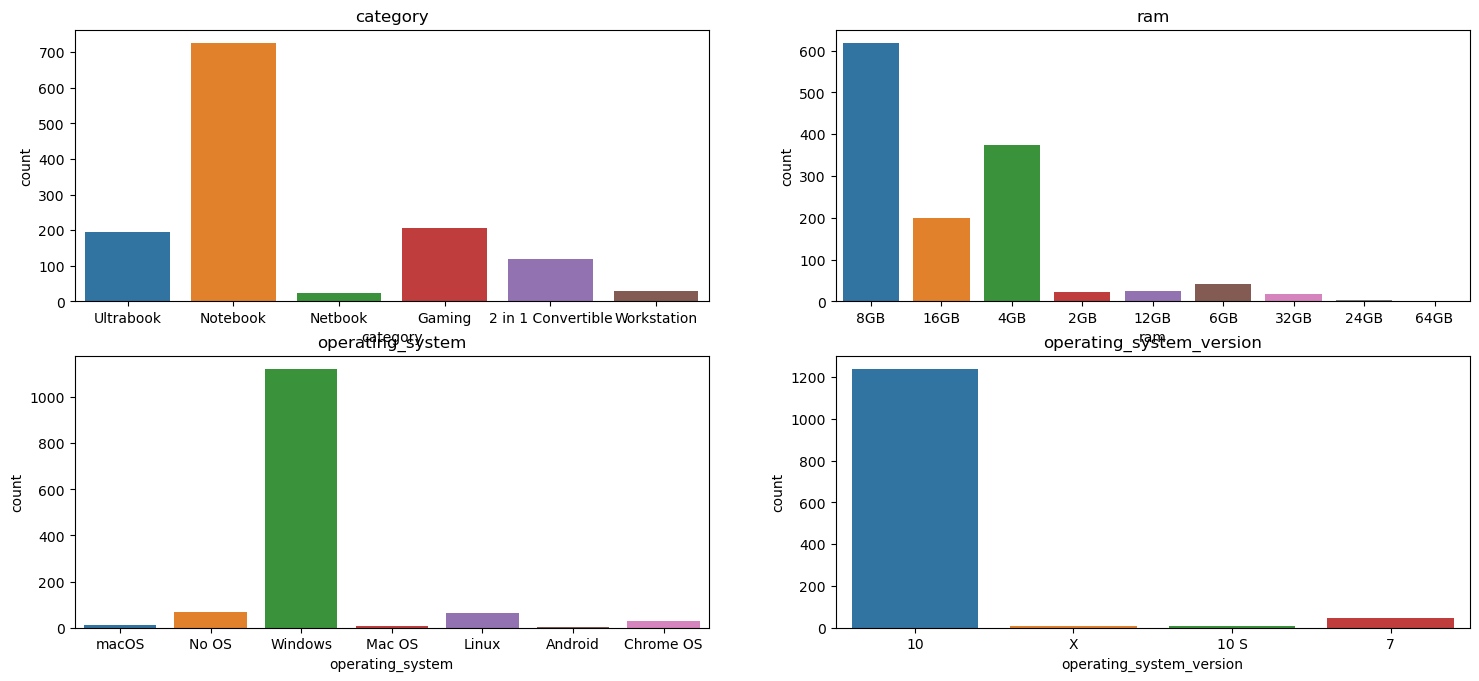

In [24]:
plt.figure(figsize = (18, 12))

plt.subplot(3, 2, 1)
plt.title('category')
sns.countplot(x = 'category', data = df)

plt.subplot(3, 2, 2)
plt.title('ram')
sns.countplot(x = 'ram', data = df)

plt.subplot(3, 2, 3)
plt.title('operating_system')
sns.countplot(x = 'operating_system', data = df)

plt.subplot(3, 2, 4)
plt.title('operating_system_version')
sns.countplot(x = 'operating_system_version', data = df)

<AxesSubplot:title={'center':'screen_size'}, xlabel='screen_size', ylabel='count'>

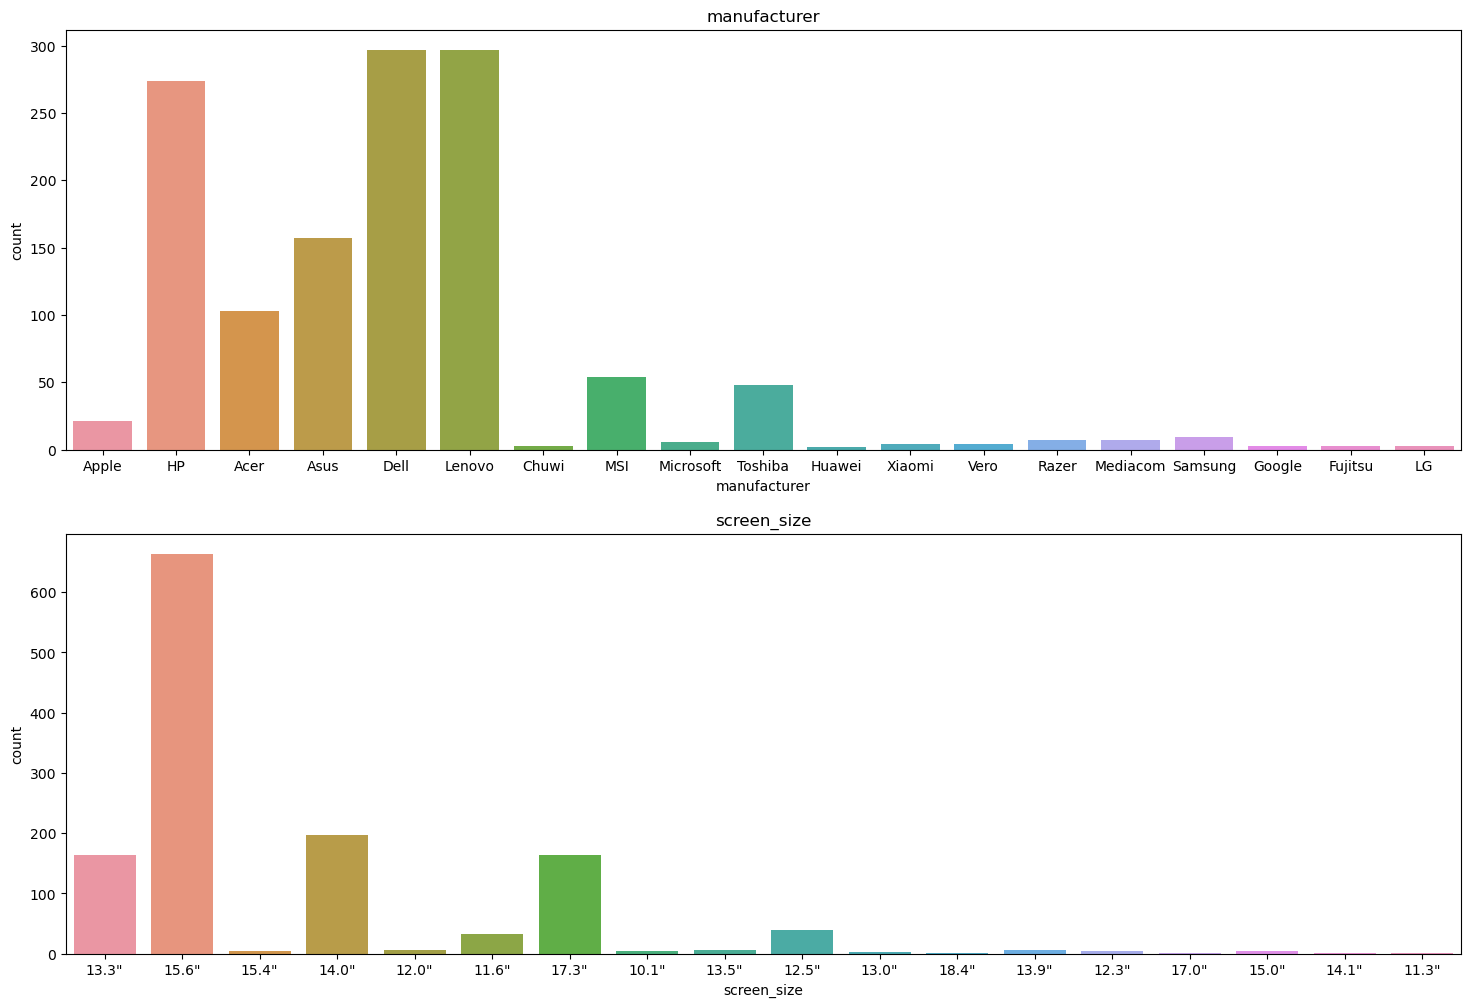

In [25]:
plt.figure(figsize = (18, 12))

plt.subplot(2, 1, 1)
plt.title('manufacturer')
sns.countplot(x = 'manufacturer', data = df)

plt.subplot(2, 1, 2)
plt.title('screen_size')
sns.countplot(x = 'screen_size', data = df)

### Looking at top 10s

#### Top 10 most expensive Model Names

[Text(0.5, 0, 'Model Name'),
 Text(0, 0.5, 'selling price ($)'),
 Text(0.5, 1.0, 'Top 10 most expensive motorcycles')]

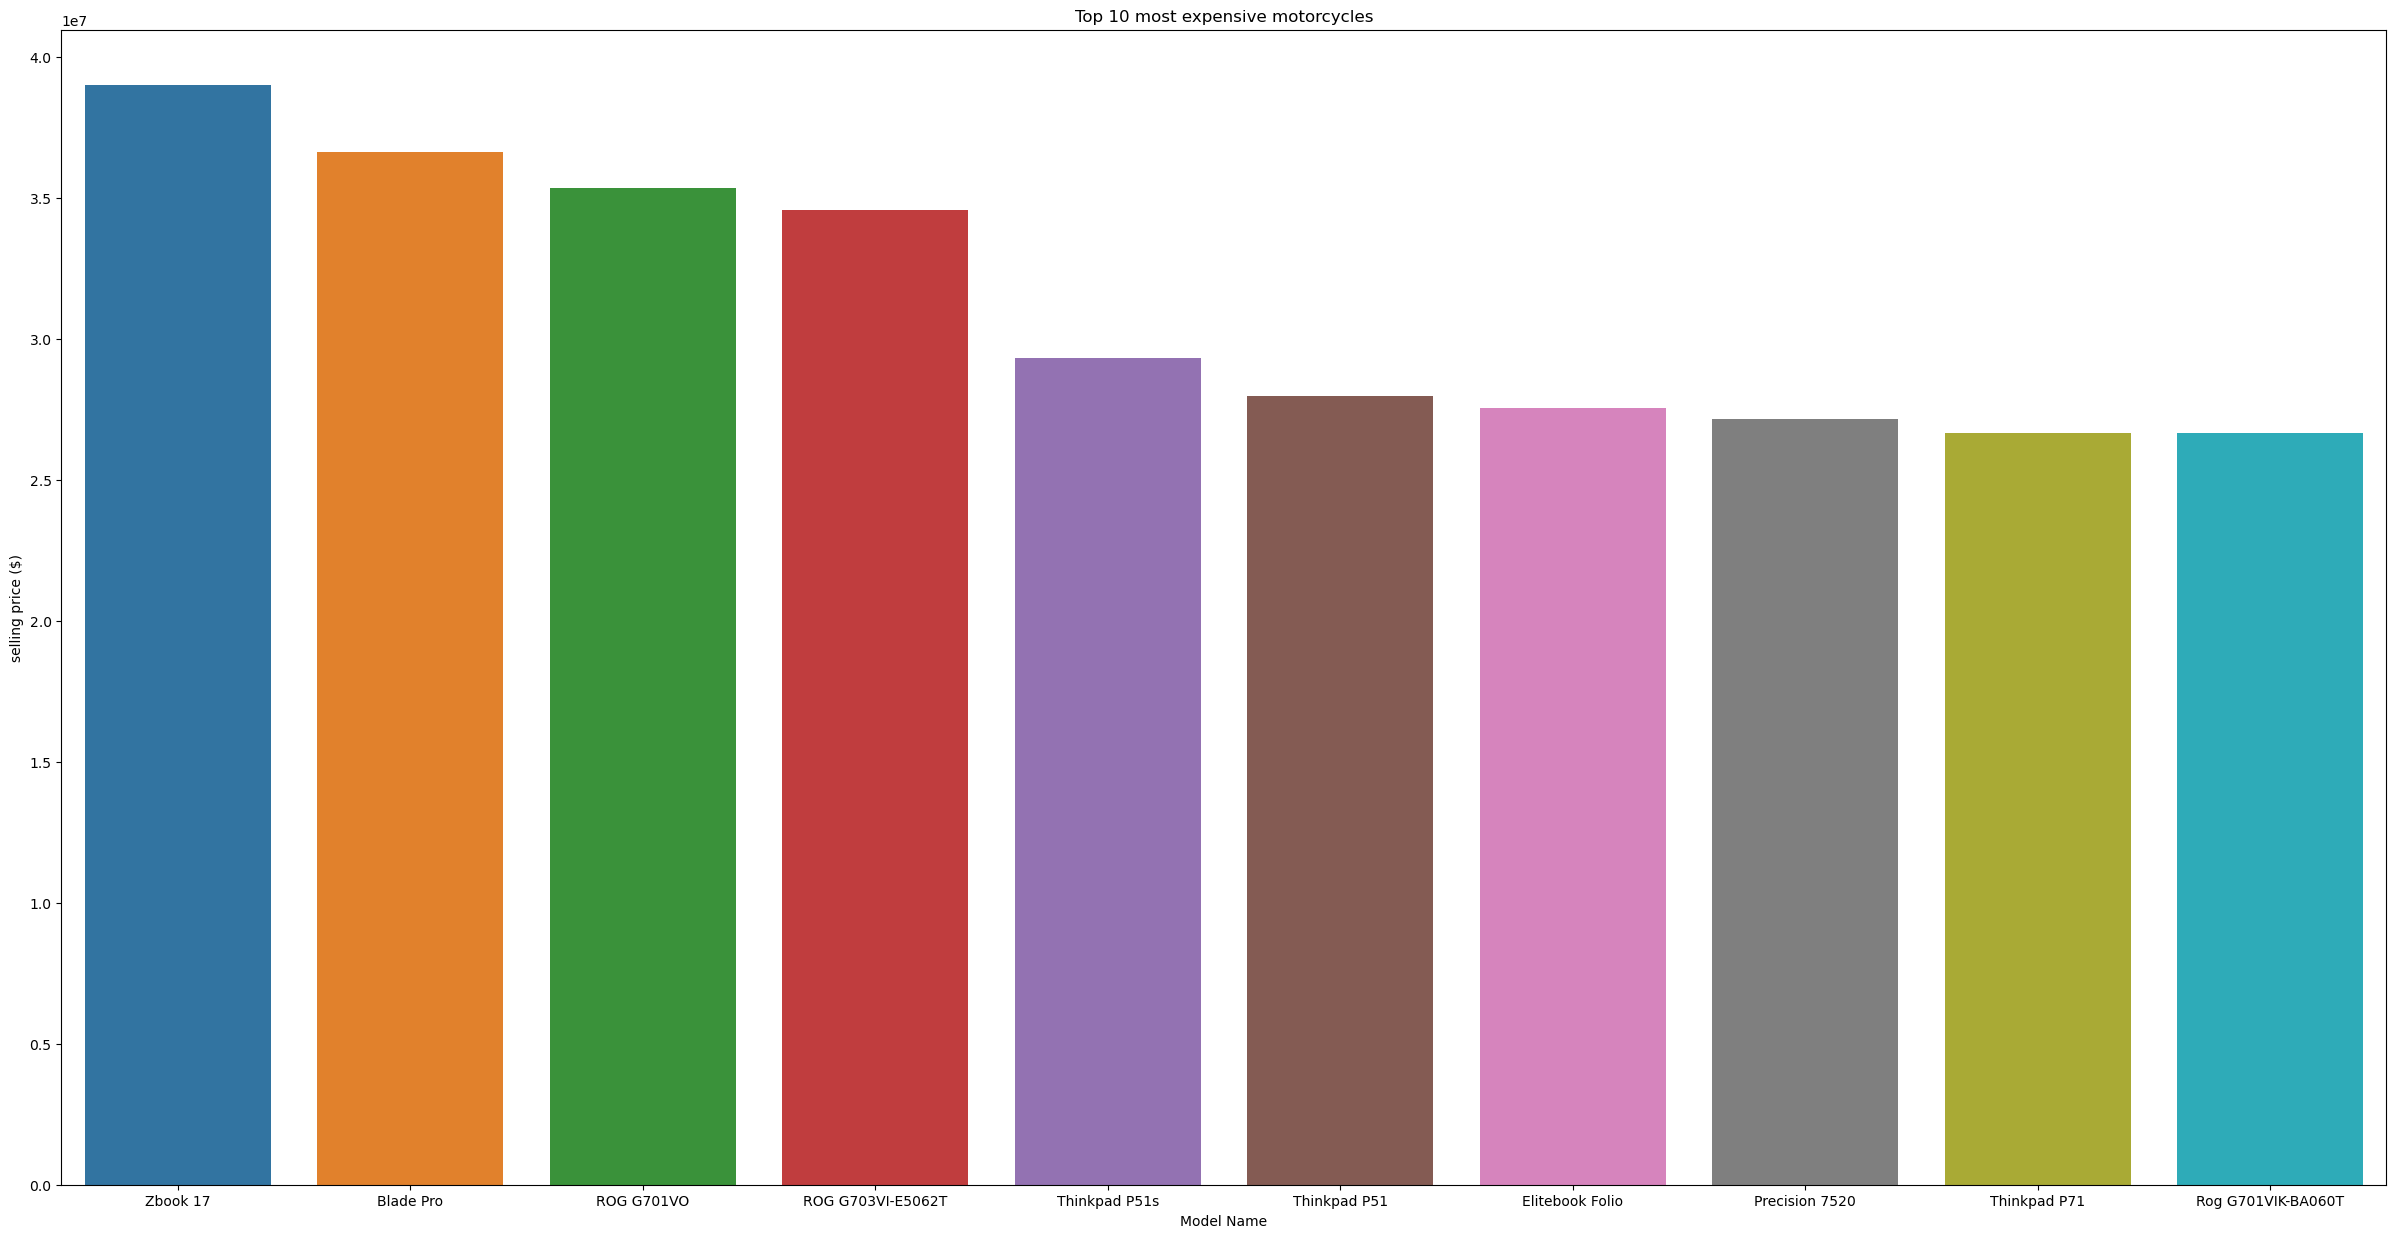

In [26]:
fig, ax = plt.subplots(figsize=(30, 15))
ax = sns.barplot(x=df.groupby('model_name').mean()['price'].sort_values(ascending=False)[:10].index, y=df.groupby('model_name').mean()['price'].sort_values(ascending=False)[:10].values)
ax.set(xlabel='Model Name', ylabel='selling price ($)', title='Top 10 most expensive motorcycles')

#### Top 10 most expensive Screen Sizes

[Text(0.5, 0, 'Screen Size'),
 Text(0, 0.5, 'selling price ($)'),
 Text(0.5, 1.0, 'Top 10 most expensive Screen sizes')]

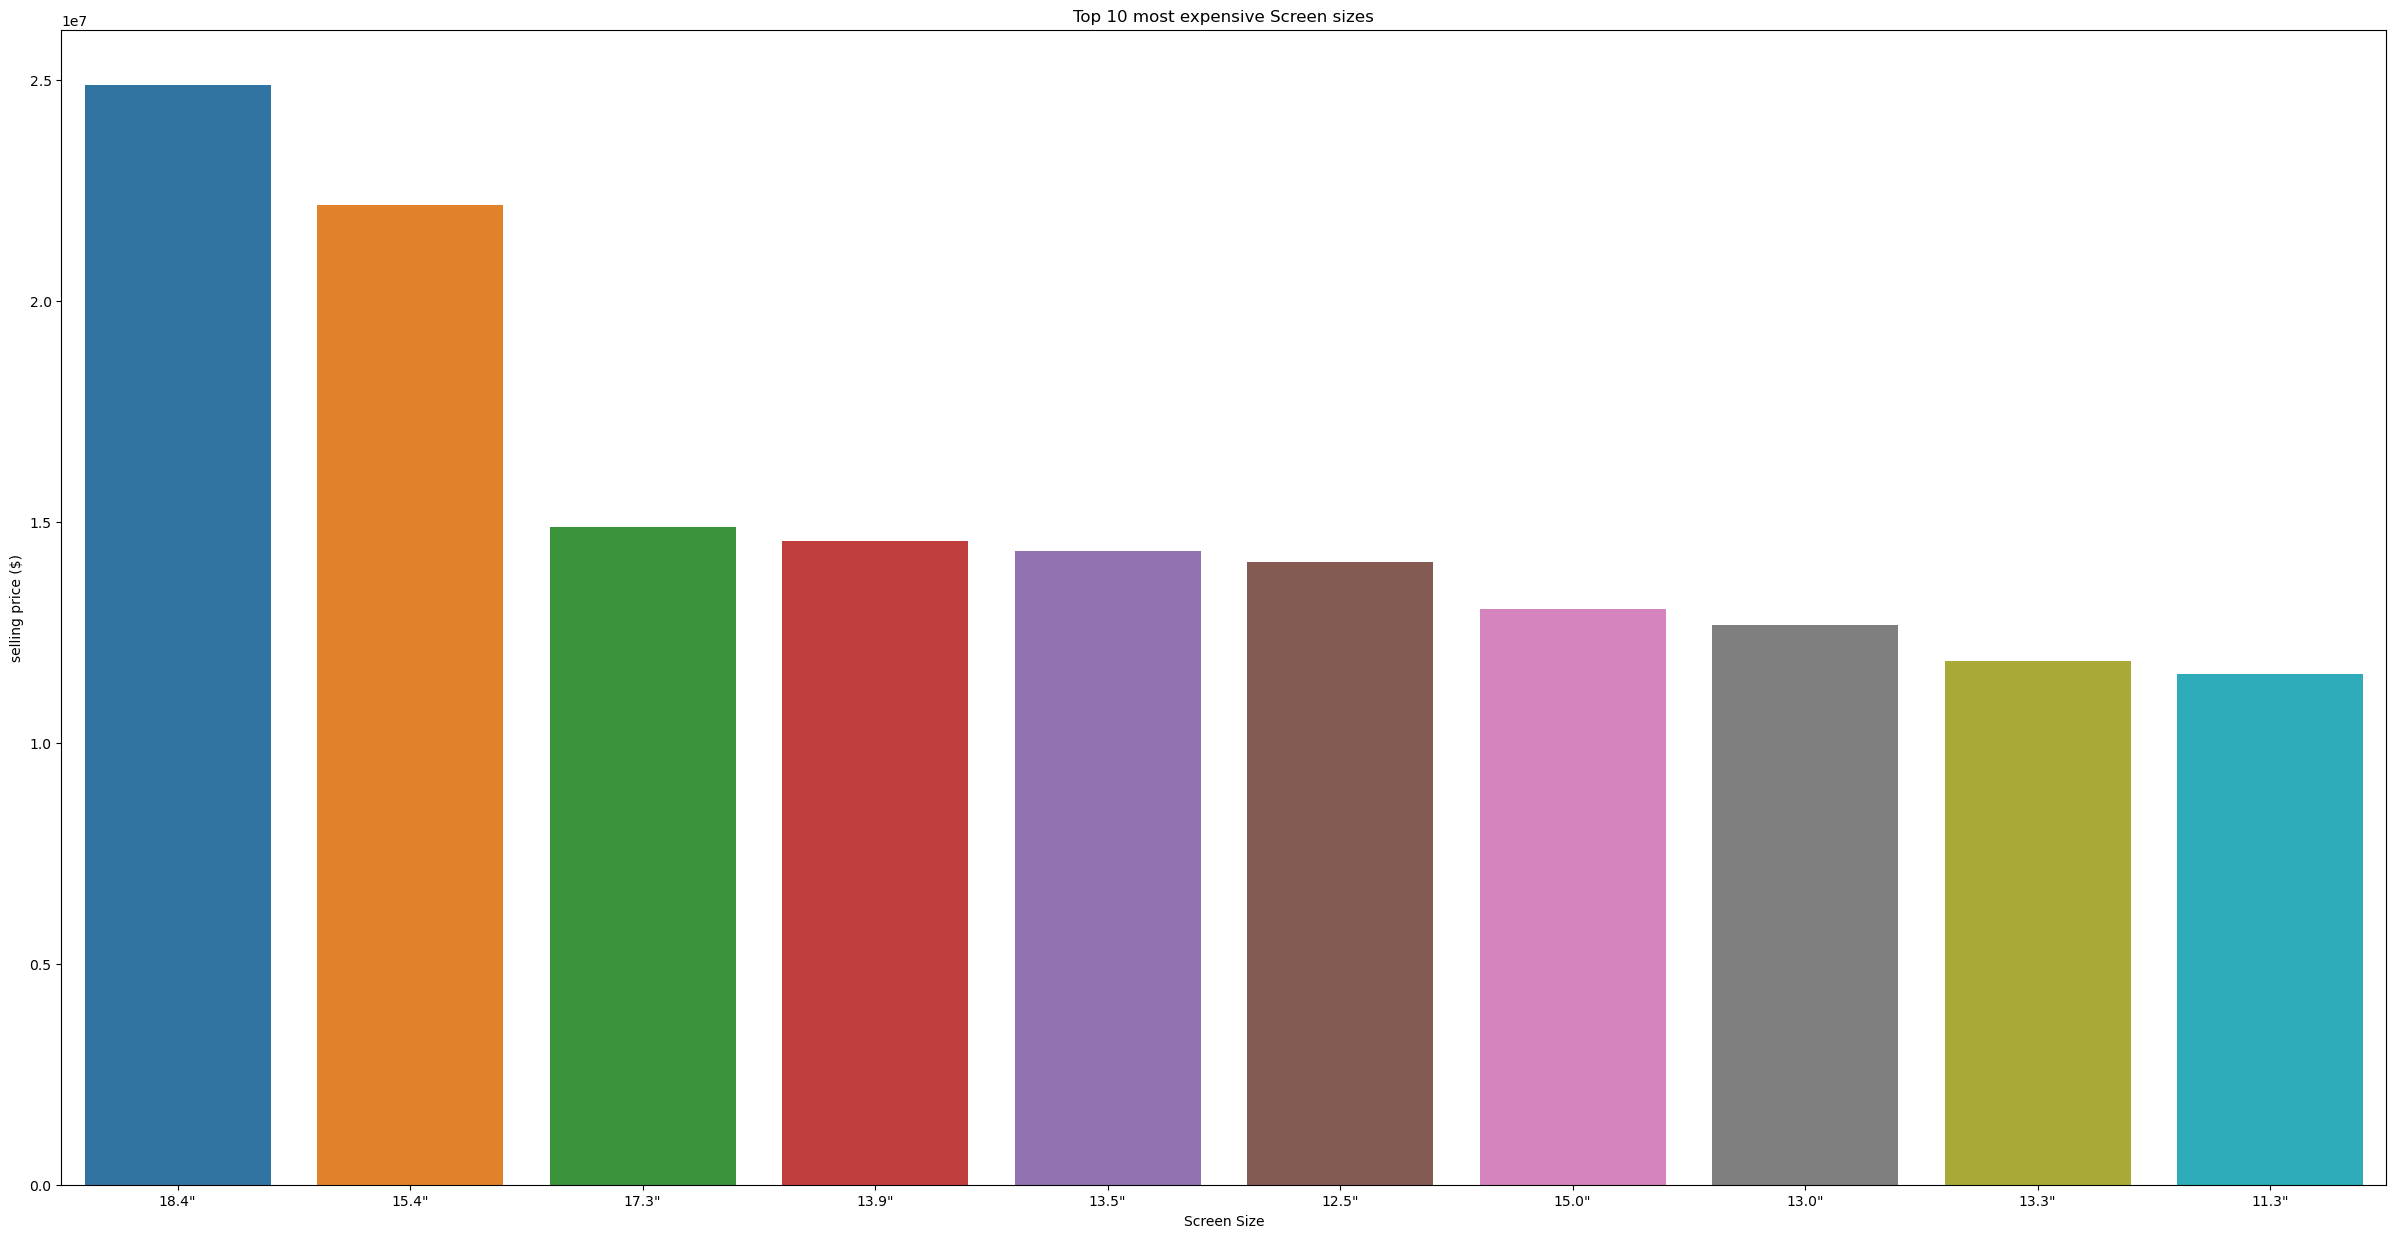

In [27]:
fig, ax = plt.subplots(figsize=(30, 15))
ax = sns.barplot(x=df.groupby('screen_size').mean()['price'].sort_values(ascending=False)[:10].index, y=df.groupby('screen_size').mean()['price'].sort_values(ascending=False)[:10].values)
ax.set(xlabel='Screen Size', ylabel='selling price ($)', title='Top 10 most expensive Screen sizes')

#### Top 10 most expensive Screens

[Text(0.5, 0, 'Screen'),
 Text(0, 0.5, 'selling price ($)'),
 Text(0.5, 1.0, 'Top 10 most expensive Screens')]

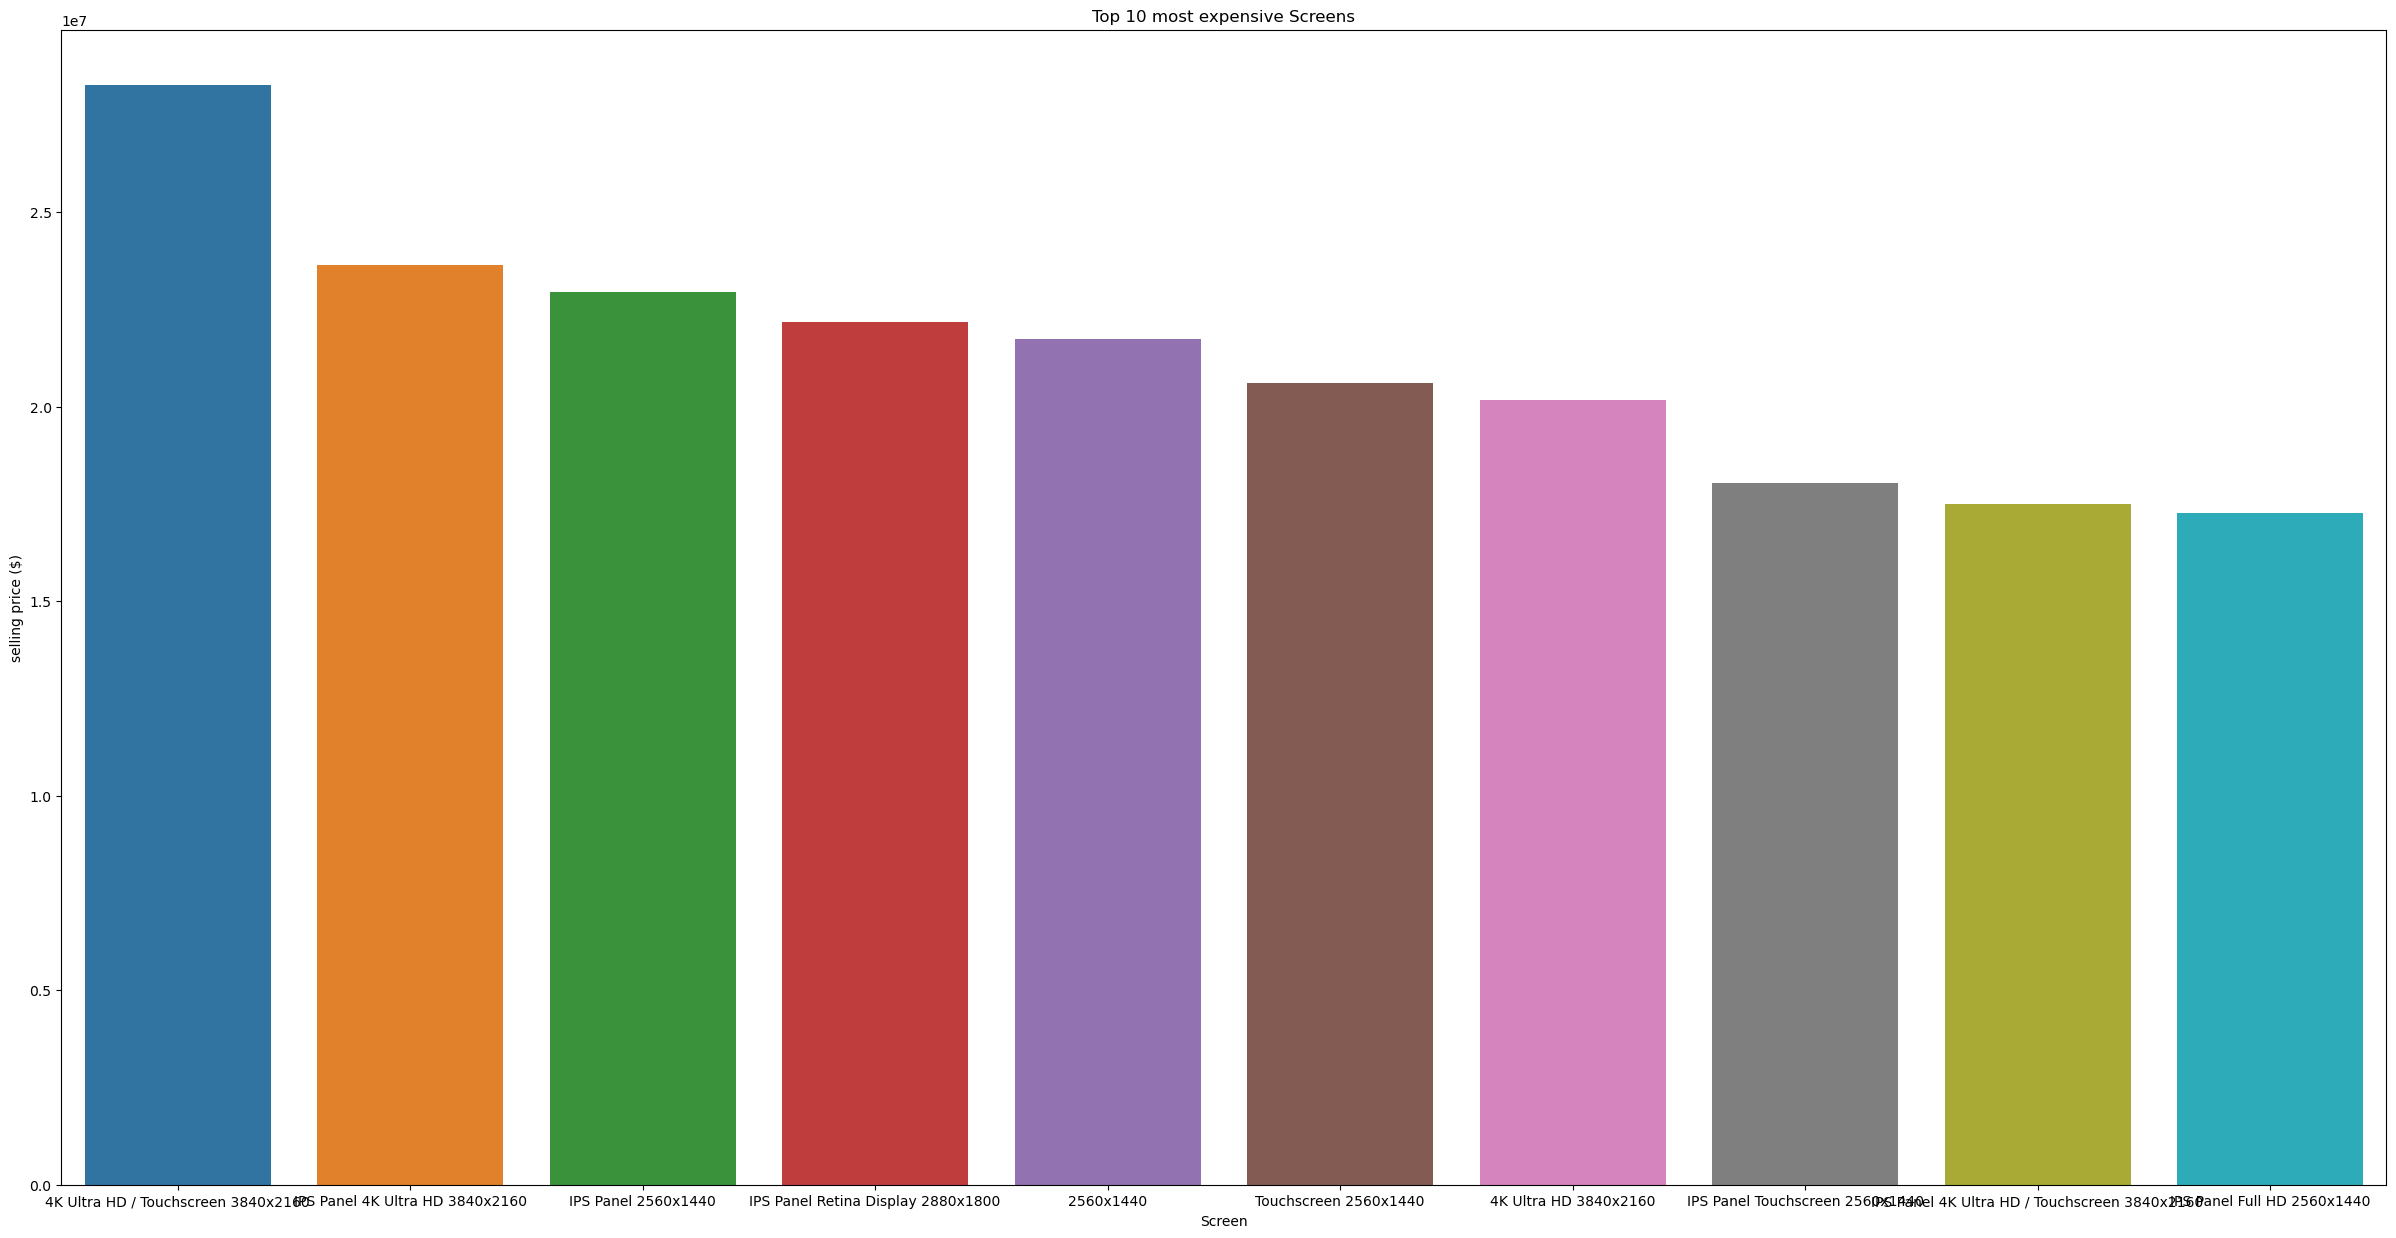

In [28]:
fig, ax = plt.subplots(figsize=(30, 15))
ax = sns.barplot(x=df.groupby('screen').mean()['price'].sort_values(ascending=False)[:10].index, y=df.groupby('screen').mean()['price'].sort_values(ascending=False)[:10].values)
ax.set(xlabel='Screen', ylabel='selling price ($)', title='Top 10 most expensive Screens')

#### Top 10 most expensive CPUs

[Text(0.5, 0, 'CPU'),
 Text(0, 0.5, 'selling price ($)'),
 Text(0.5, 1.0, 'Top 10 most expensive CPUs')]

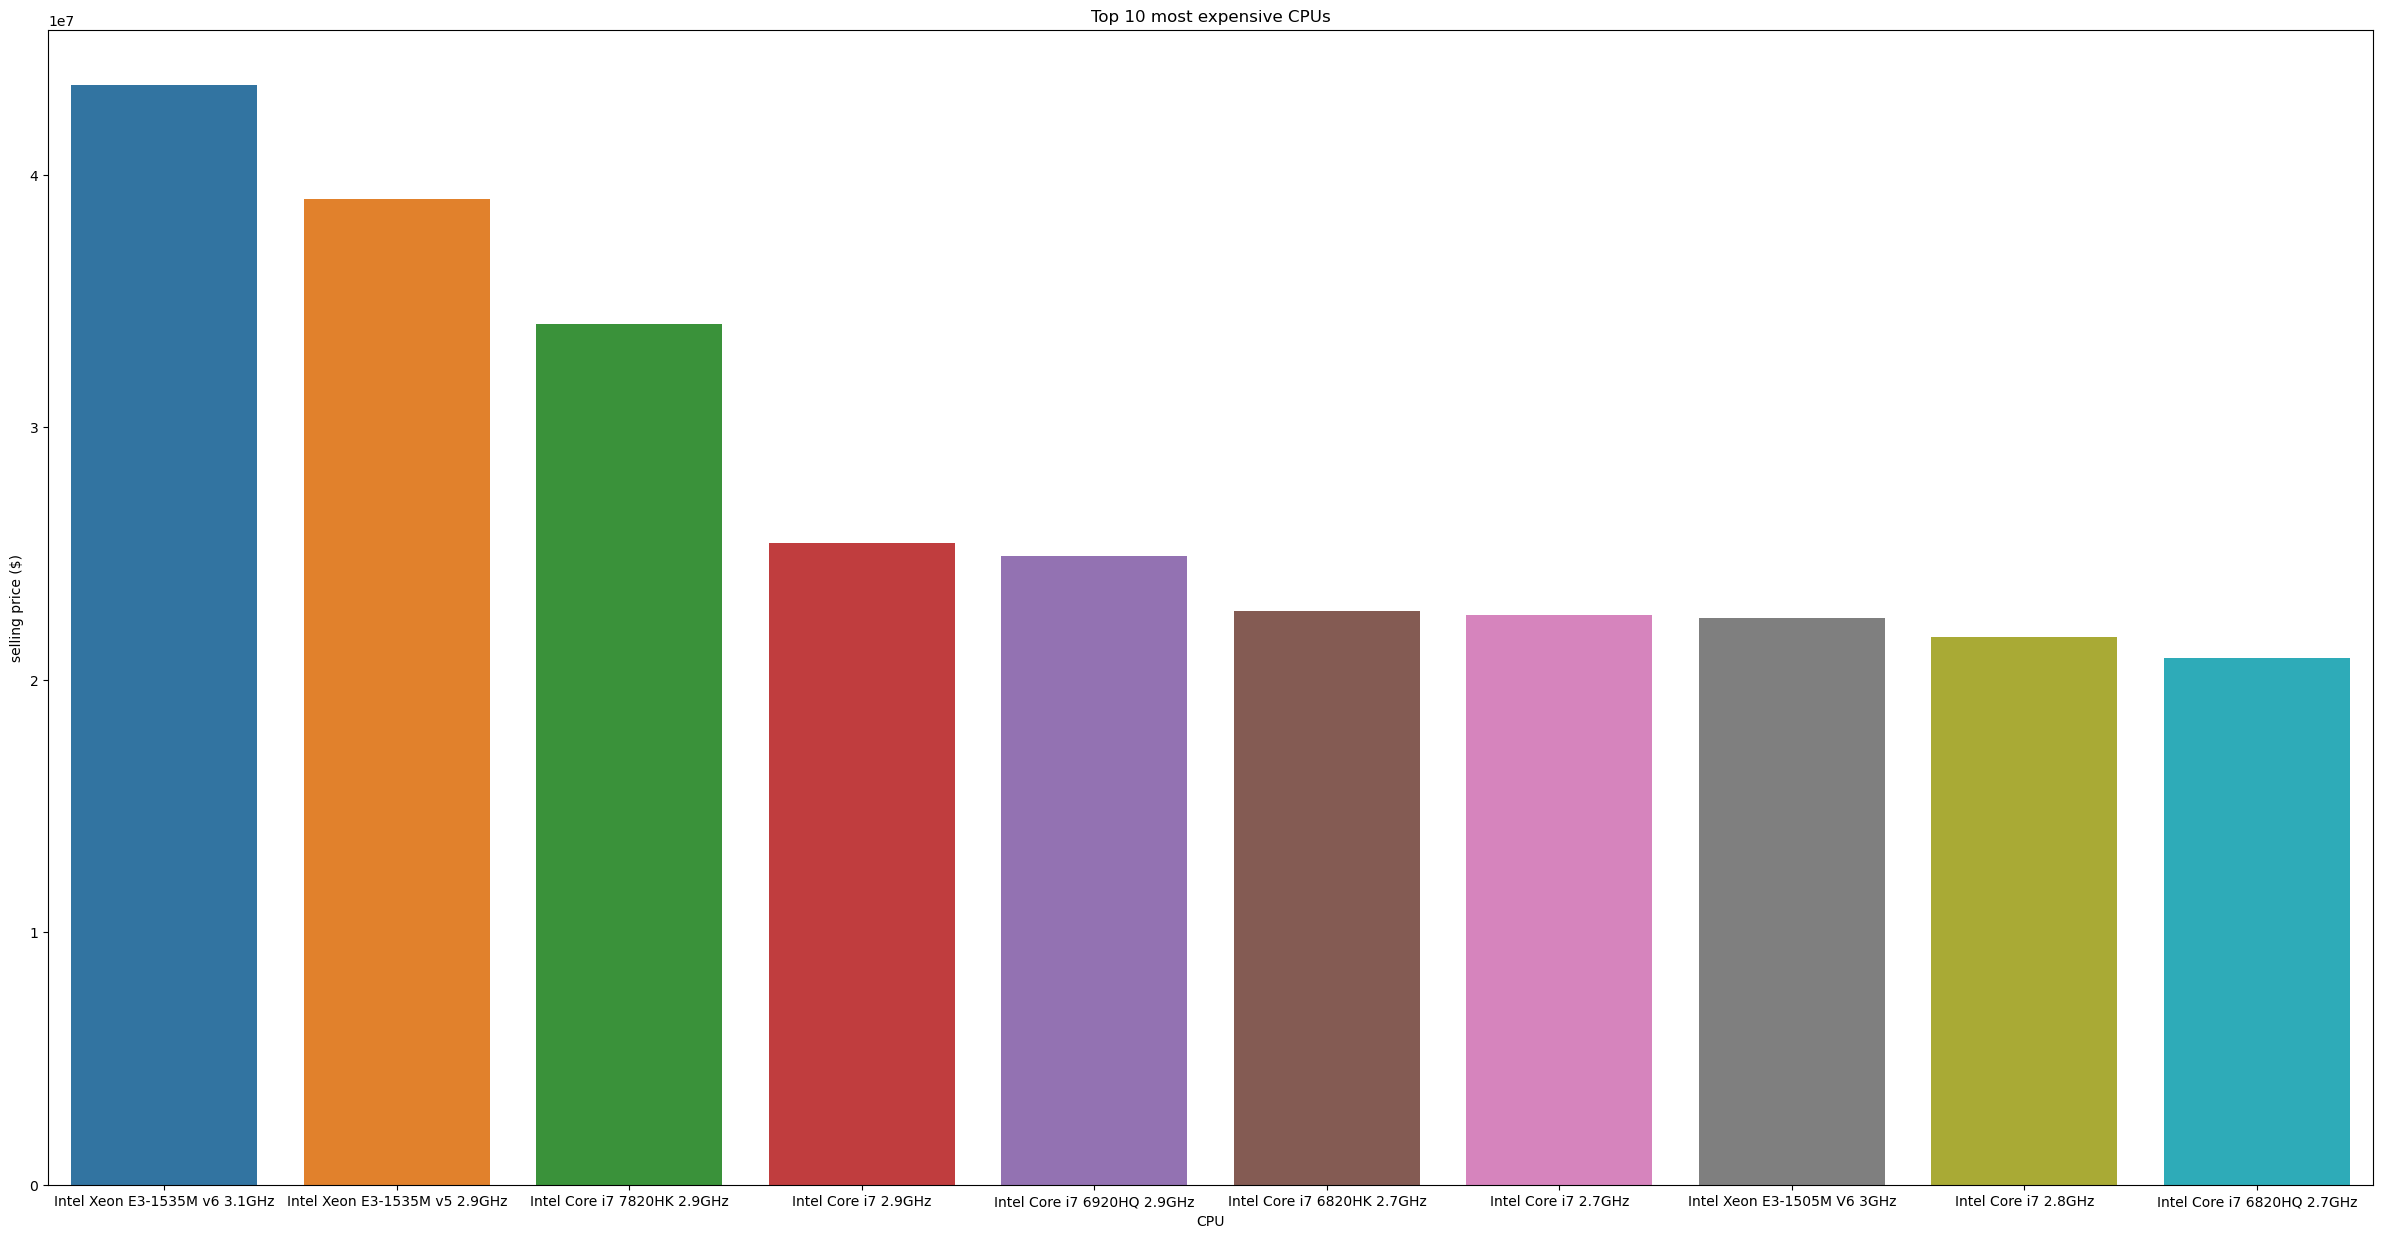

In [29]:
fig, ax = plt.subplots(figsize=(30, 15))
ax = sns.barplot(x=df.groupby('cpu').mean()['price'].sort_values(ascending=False)[:10].index, y=df.groupby('cpu').mean()['price'].sort_values(ascending=False)[:10].values)
ax.set(xlabel='CPU', ylabel='selling price ($)', title='Top 10 most expensive CPUs')

#### Top 10 most expensive GPUs

[Text(0.5, 0, 'GPU'),
 Text(0, 0.5, 'selling price ($)'),
 Text(0.5, 1.0, 'Top 10 most expensive GPUs')]

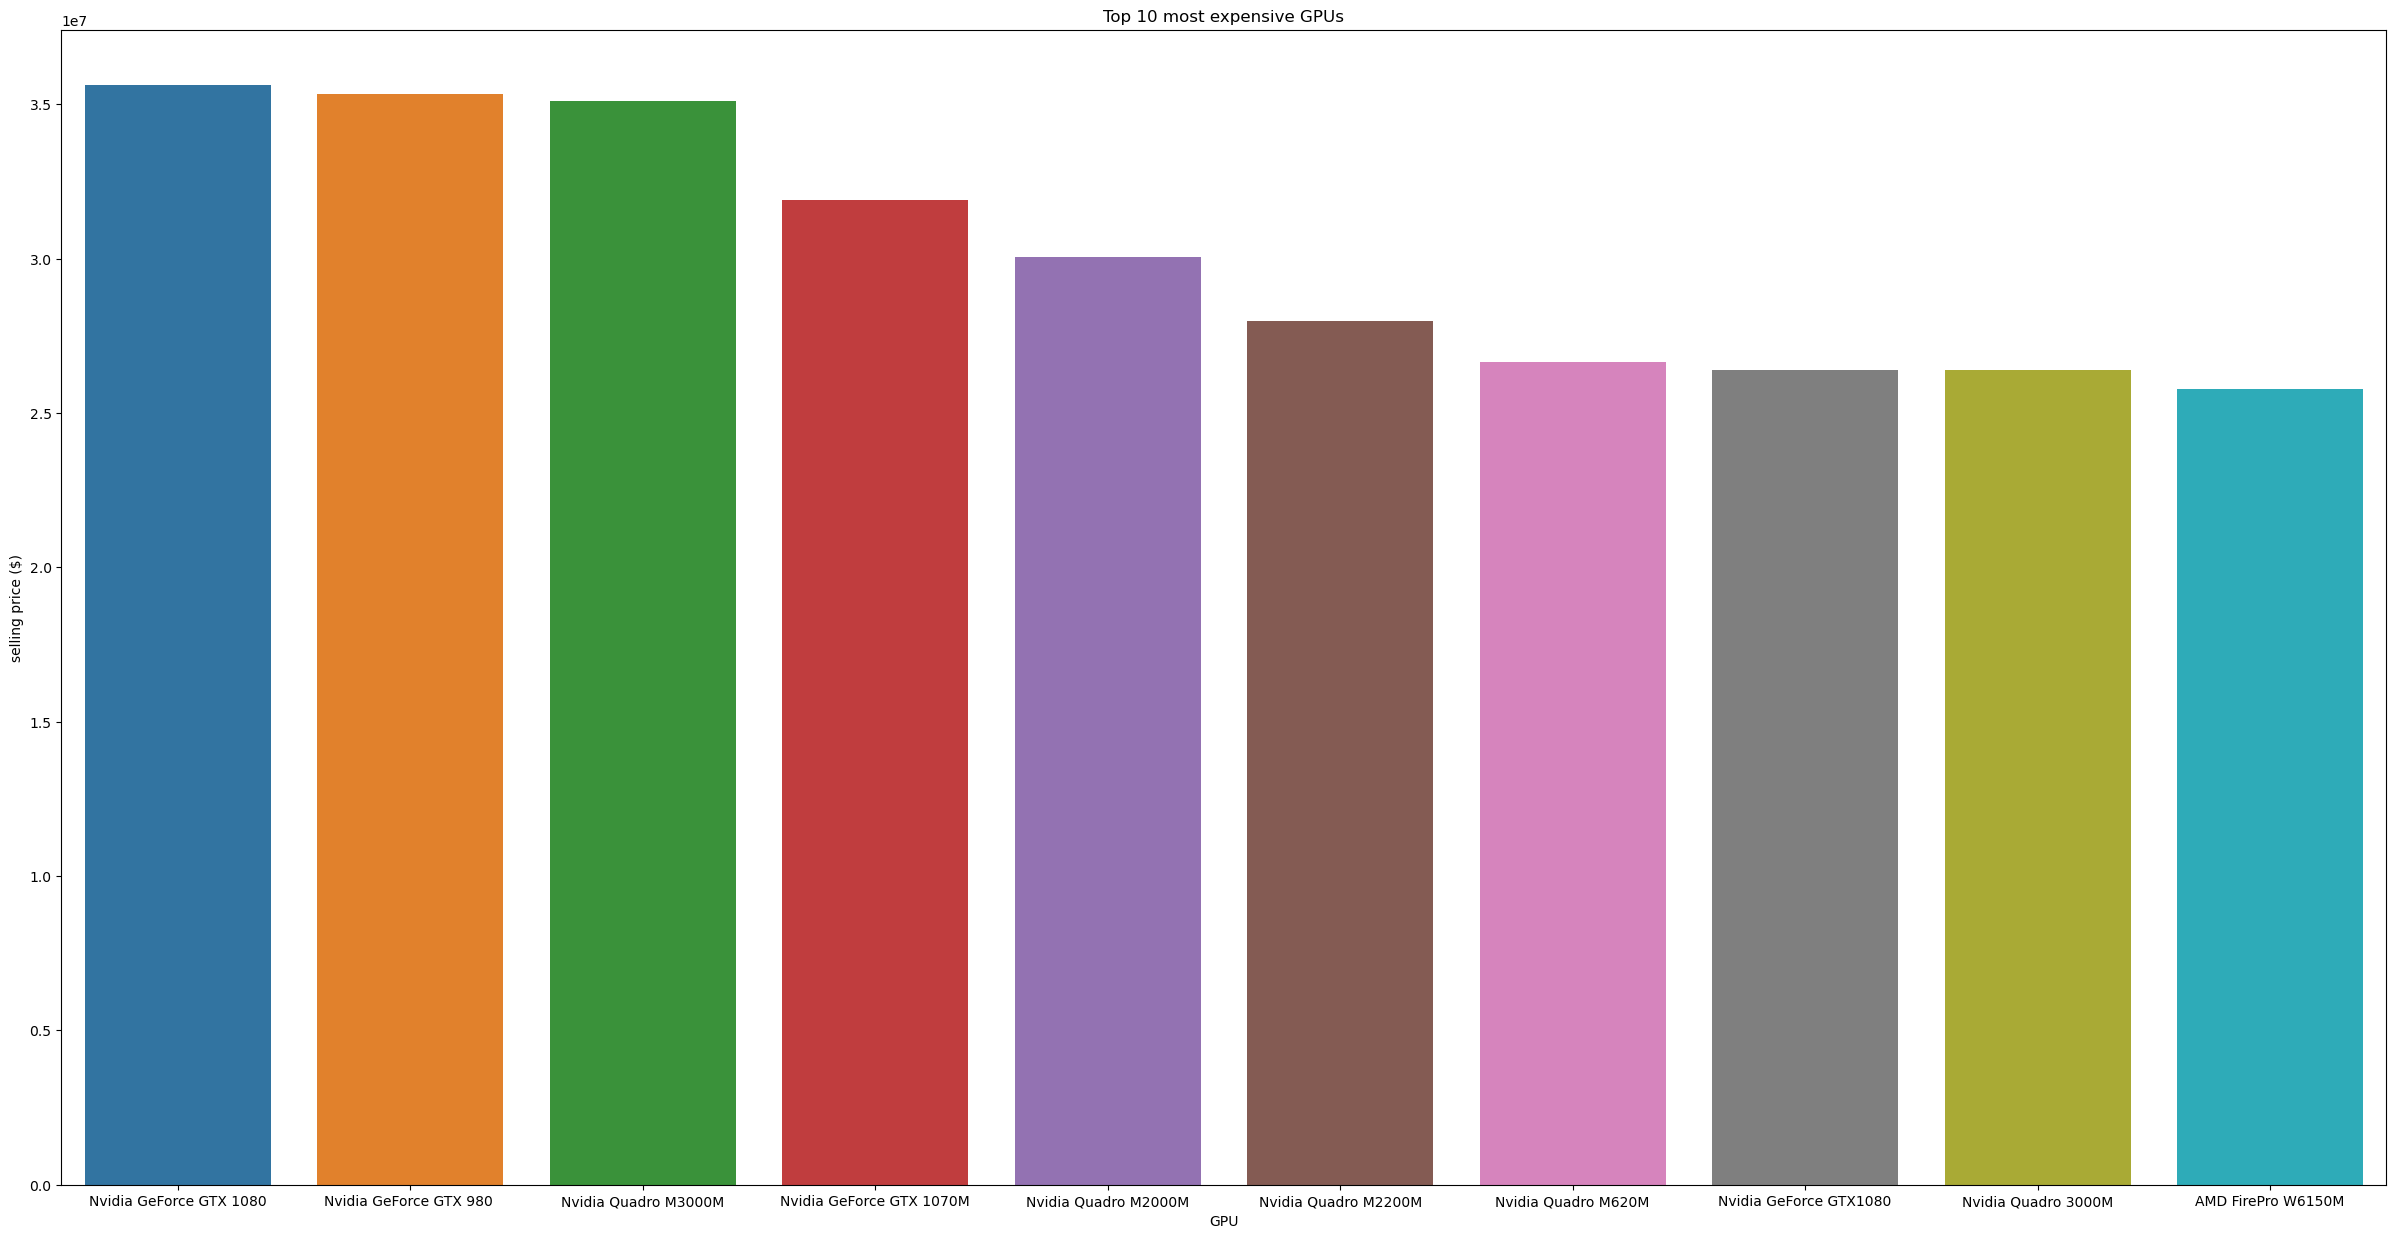

In [30]:
fig, ax = plt.subplots(figsize=(30, 15))
ax = sns.barplot(x=df.groupby('gpu').mean()['price'].sort_values(ascending=False)[:10].index, y=df.groupby('gpu').mean()['price'].sort_values(ascending=False)[:10].values)
ax.set(xlabel='GPU', ylabel='selling price ($)', title='Top 10 most expensive GPUs')

#### Top 10 most expensive RAM

[Text(0.5, 0, 'RAM'),
 Text(0, 0.5, 'selling price ($)'),
 Text(0.5, 1.0, 'Top 10 most expensive RAM')]

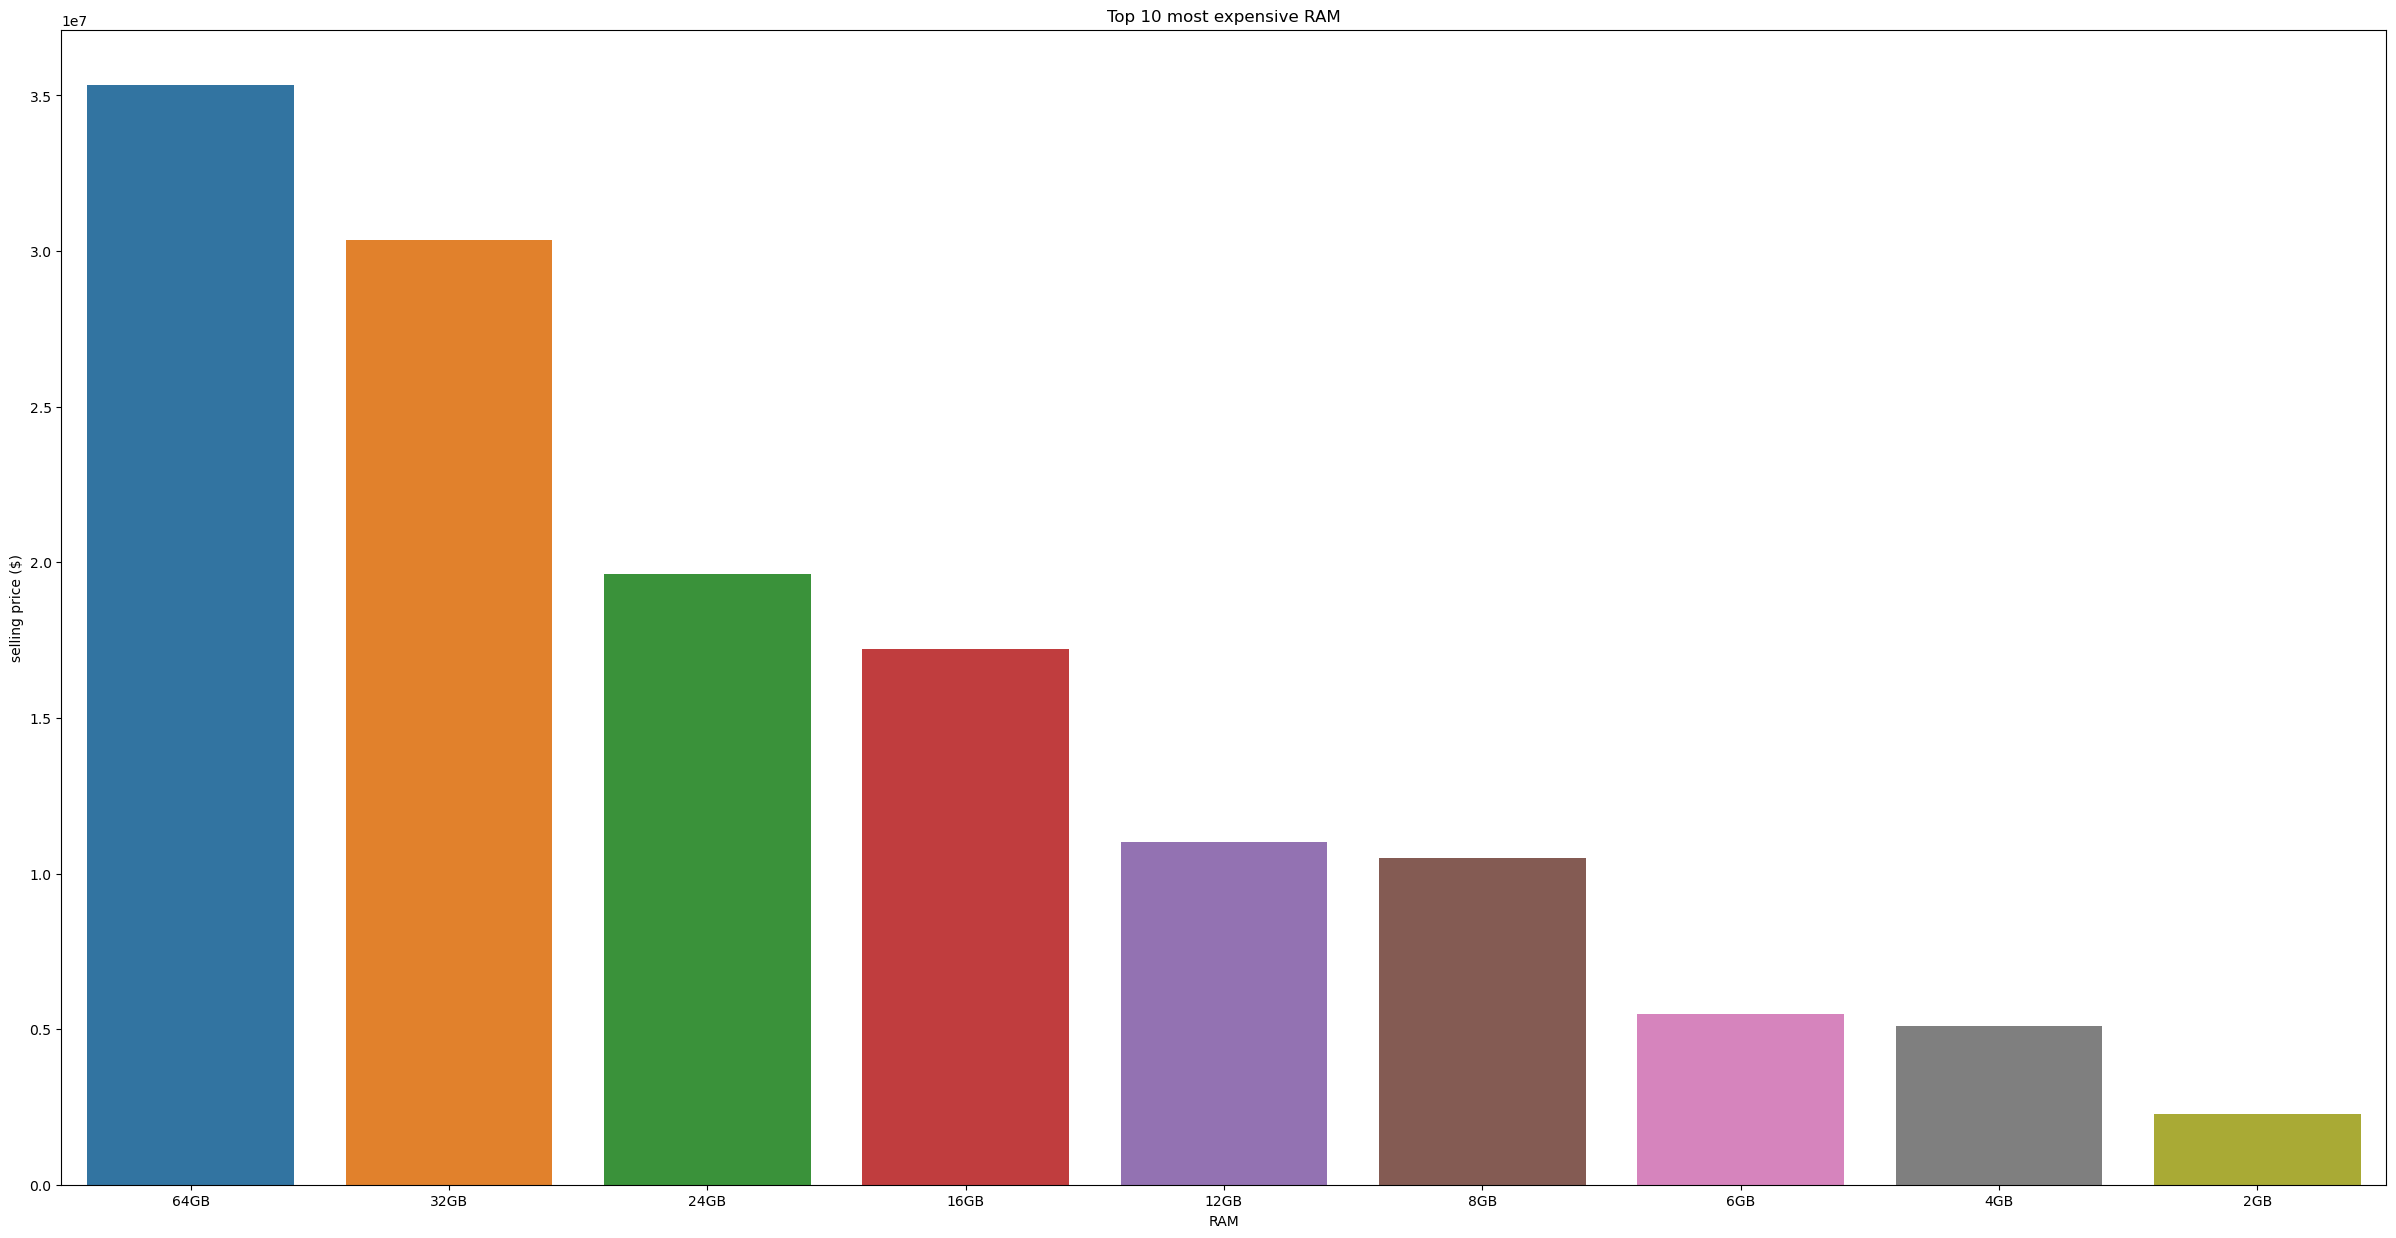

In [31]:
fig, ax = plt.subplots(figsize=(30, 15))
ax = sns.barplot(x=df.groupby('ram').mean()['price'].sort_values(ascending=False)[:10].index, y=df.groupby('ram').mean()['price'].sort_values(ascending=False)[:10].values)
ax.set(xlabel='RAM', ylabel='selling price ($)', title='Top 10 most expensive RAM')

#### Top 10 most expensive Storage

[Text(0.5, 0, 'Storage'),
 Text(0, 0.5, 'selling price ($)'),
 Text(0.5, 1.0, 'Top 10 most expensive Storage')]

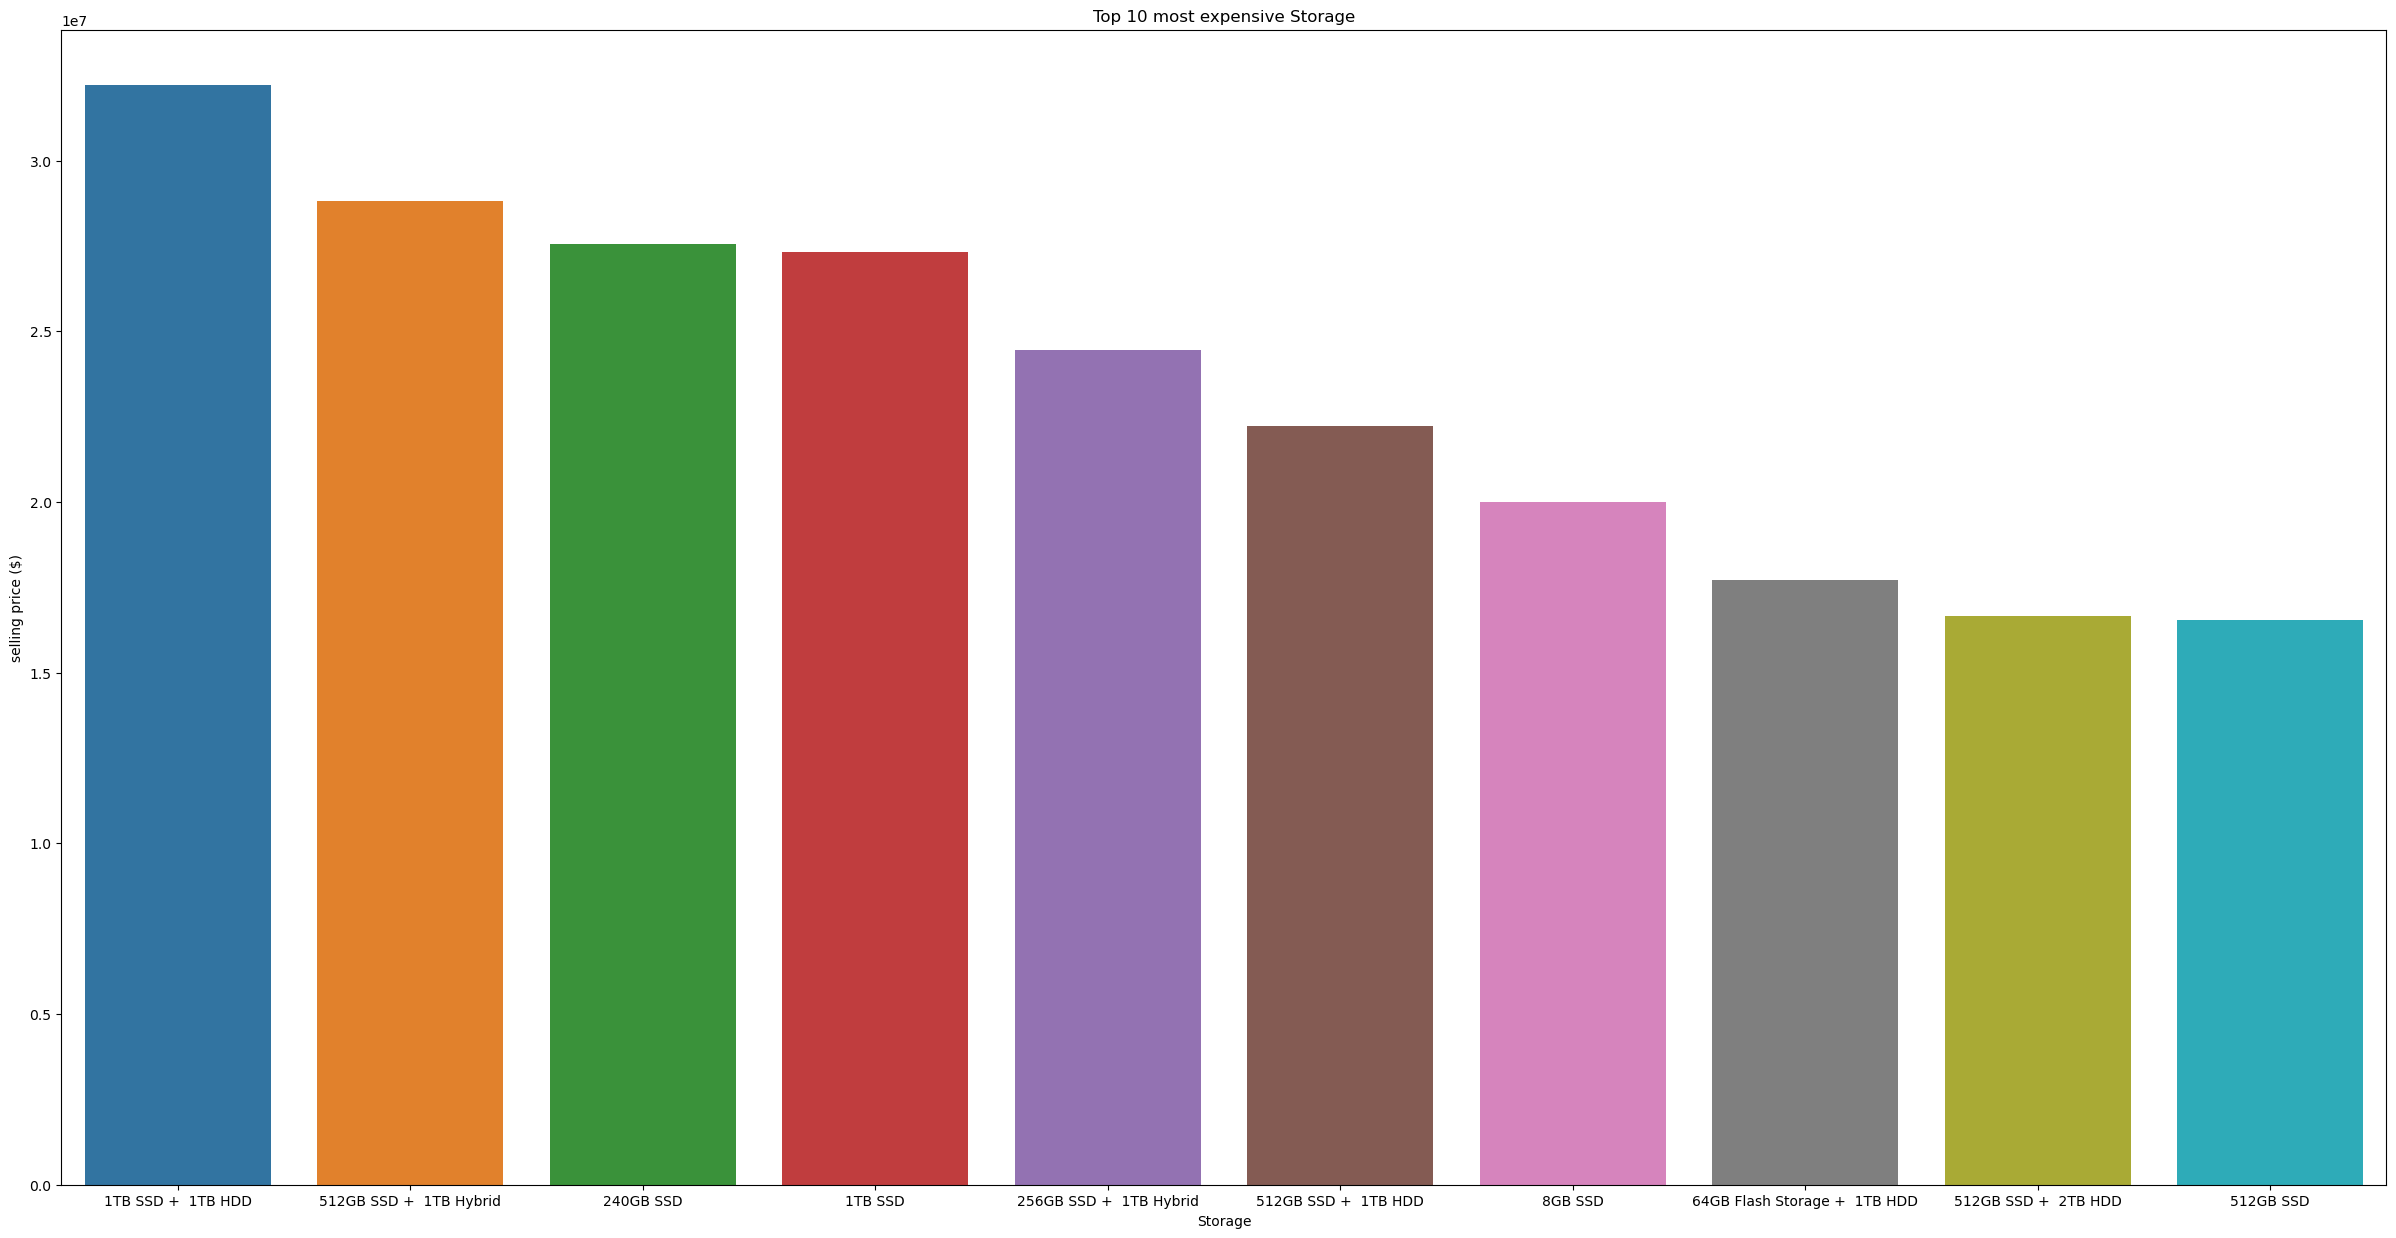

In [32]:
fig, ax = plt.subplots(figsize=(30, 15))
ax = sns.barplot(x=df.groupby('_storage').mean()['price'].sort_values(ascending=False)[:10].index, y=df.groupby('_storage').mean()['price'].sort_values(ascending=False)[:10].values)
ax.set(xlabel='Storage', ylabel='selling price ($)', title='Top 10 most expensive Storage')

### Identifying Outliers in weight and price

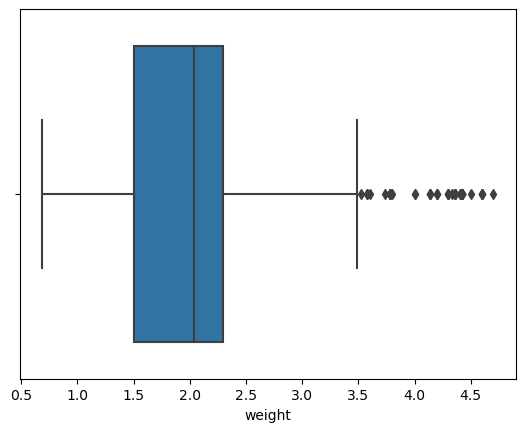

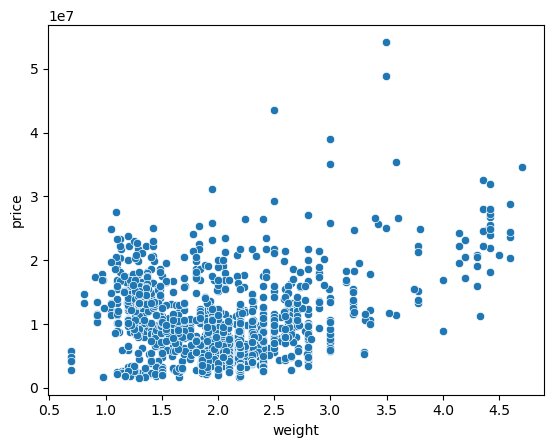

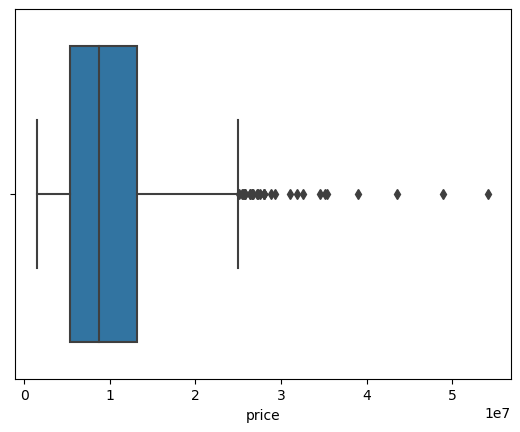

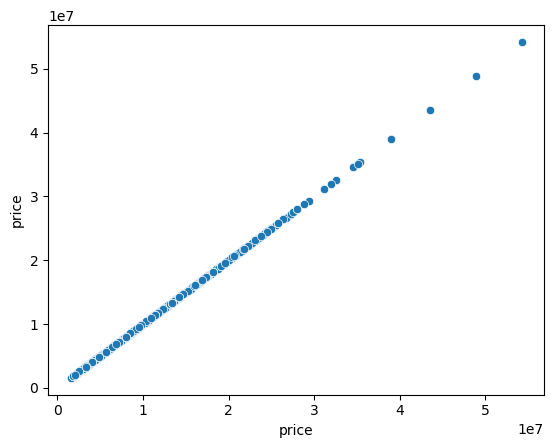

In [33]:
for col in df.columns:
    if df[col].dtype != 'object':
        bp = sns.boxplot(data = df, x = col)
        plt.show()
        sp = sns.scatterplot(data=df, x=col, y=df['price'])
        plt.show()

`There are some outliers (very few) we will leave it`

### Checking for duplicate rows

In [34]:
df.duplicated().sum()

28

In [35]:
df[df.duplicated()]

,manufacturer,model_name,category,screen_size,screen,cpu,ram,_storage,gpu,operating_system,operating_system_version,weight,price
297,Asus,ZenBook UX305CA-UBM1,Ultrabook,"13.3""",IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows,10,1.20,6482268.00
298,Dell,Inspiron 3567,Notebook,"15.6""",1366x768,Intel Core i3 7100U 2.4GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.30,4081428.00
299,Acer,Aspire ES1-531,Notebook,"15.6""",1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,10,2.40,2569788.00
300,Dell,Inspiron 3552,Notebook,"15.6""",1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,500GB HDD,Intel HD Graphics,Windows,10,2.20,3370068.00
301,Lenovo,IdeaPad Y700-15ISK,Notebook,"15.6""",IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows,10,2.60,7993908.00
302,HP,Pavilion 15-AW003nv,Notebook,"15.6""",Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1TB Hybrid,AMD Radeon R7 M440,Windows,10,2.04,4890511.08
303,Dell,Inspiron 3567,Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,10,2.30,7166863.08
304,HP,Stream 11-Y000na,Netbook,"11.6""",1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows,10,1.17,1858428.00
305,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,"15.6""",1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows,10,2.20,6405085.44
306,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,"14.0""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,10,1.80,5673096.00


`From the table there are no duplicate data`

# Data Modeling

In [36]:
df.dtypes

manufacturer                 object
model_name                   object
category                     object
screen_size                  object
screen                       object
cpu                          object
ram                          object
_storage                     object
gpu                          object
operating_system             object
operating_system_version     object
weight                      float64
price                       float64
dtype: object

In [37]:
le = LabelEncoder()
df["manufacturer"] = le.fit_transform(df["manufacturer"])
df["model_name"] = le.fit_transform(df["model_name"])
df["category"] = le.fit_transform(df["category"])
df["screen_size"] = le.fit_transform(df["screen_size"])
df["screen"] = le.fit_transform(df["screen"])
df["cpu"] = le.fit_transform(df["cpu"])
df["ram"] = le.fit_transform(df["ram"])
df["_storage"] = le.fit_transform(df["_storage"])
df["gpu"] = le.fit_transform(df["gpu"])
df["operating_system"] = le.fit_transform(df["operating_system"])
df["operating_system_version"] = le.fit_transform(df["operating_system_version"])

In [38]:
df.dtypes

manufacturer                  int64
model_name                    int64
category                      int64
screen_size                   int64
screen                        int64
cpu                           int64
ram                           int64
_storage                      int64
gpu                           int64
operating_system              int64
operating_system_version      int64
weight                      float64
price                       float64
dtype: object

## Splitting the dataset into x and y

In [39]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
y = y.reshape(-1, 1)

In [40]:
x.shape

(1302, 12)

In [41]:
y.shape

(1302, 1)

## Standardizing the data

In [42]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

## Splitting the dataset into the Training set and Test set

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Using Multiple Linear Regression Model 

### Training the Multiple Linear Regression model on the Training set

In [44]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

### Predicting the Test set results

In [45]:
y_pred_reg = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_reg.reshape(len(y_pred_reg),1), y_test.reshape(len(y_test),1)),1))

[[-2.82e-01 -1.05e+00]
 [-7.59e-02  5.25e-01]
 [ 5.71e-01  1.05e+00]
 [-6.05e-01 -7.31e-01]
 [ 7.31e-01  1.82e+00]
 [-5.57e-01 -7.68e-01]
 [-1.38e+00 -1.03e+00]
 [-1.52e+00 -9.49e-01]
 [ 2.98e-02  3.05e-02]
 [ 1.17e+00  2.68e+00]
 [ 3.13e-01  1.96e-01]
 [-1.57e-01 -8.22e-01]
 [-1.18e+00 -1.32e+00]
 [-1.14e-01 -1.28e-01]
 [ 1.54e+00  2.09e-01]
 [-1.39e-01 -5.09e-01]
 [-4.95e-01 -8.95e-01]
 [ 2.62e-01  1.15e+00]
 [ 2.09e-01  1.40e+00]
 [ 7.87e-01  1.11e+00]
 [-2.23e-01 -1.14e+00]
 [-2.31e-02 -3.95e-01]
 [-3.31e-01 -6.51e-01]
 [-1.22e-01  3.17e-01]
 [-6.06e-01 -8.35e-01]
 [ 4.89e-01 -5.53e-01]
 [ 1.20e-01 -9.76e-02]
 [ 5.15e-02 -2.98e-01]
 [-8.81e-01 -4.54e-01]
 [-7.29e-01  8.18e-01]
 [-2.11e-01  2.32e-01]
 [ 1.74e-01 -5.77e-01]
 [-4.46e-03  7.85e-01]
 [ 2.17e-01  1.09e-01]
 [ 7.39e-01  1.10e+00]
 [-2.25e-01  1.58e+00]
 [ 1.63e+00  4.04e+00]
 [-2.36e-01 -9.68e-01]
 [ 8.25e-04  3.09e-01]
 [ 7.53e-01  5.88e-01]
 [ 1.22e+00  3.66e-01]
 [ 4.85e-02  1.09e-01]
 [ 1.24e+00  6.26e+00]
 [ 1.12e-01

### Evaluating the Model Performance

In [46]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_reg)

0.47735026637575984

## Using SVR Model 

### Training the SVR model on the Training set

In [47]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

### Predicting the Test set results

In [48]:
y_pred_svr = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_svr.reshape(len(y_pred_svr),1), y_test.reshape(len(y_test),1)),1))

[[-9.25e-01 -1.05e+00]
 [ 1.68e-01  5.25e-01]
 [ 6.30e-01  1.05e+00]
 [-8.41e-01 -7.31e-01]
 [ 9.20e-01  1.82e+00]
 [-8.25e-01 -7.68e-01]
 [-1.11e+00 -1.03e+00]
 [-9.58e-01 -9.49e-01]
 [ 7.92e-03  3.05e-02]
 [ 1.37e+00  2.68e+00]
 [ 9.90e-02  1.96e-01]
 [-6.48e-01 -8.22e-01]
 [-1.14e+00 -1.32e+00]
 [ 4.85e-01 -1.28e-01]
 [ 1.91e+00  2.09e-01]
 [-3.88e-01 -5.09e-01]
 [-6.87e-01 -8.95e-01]
 [ 1.21e+00  1.15e+00]
 [ 1.02e+00  1.40e+00]
 [ 7.31e-01  1.11e+00]
 [-8.16e-01 -1.14e+00]
 [-2.61e-03 -3.95e-01]
 [-7.15e-01 -6.51e-01]
 [ 1.05e-01  3.17e-01]
 [-5.76e-01 -8.35e-01]
 [-1.80e-01 -5.53e-01]
 [-4.65e-01 -9.76e-02]
 [-3.48e-01 -2.98e-01]
 [-5.54e-01 -4.54e-01]
 [ 6.51e-02  8.18e-01]
 [ 1.40e-02  2.32e-01]
 [-2.67e-01 -5.77e-01]
 [ 2.45e-01  7.85e-01]
 [-2.69e-01  1.09e-01]
 [ 1.19e+00  1.10e+00]
 [ 1.47e-01  1.58e+00]
 [ 1.19e+00  4.04e+00]
 [-8.93e-01 -9.68e-01]
 [ 6.49e-02  3.09e-01]
 [ 9.45e-01  5.88e-01]
 [ 8.31e-01  3.66e-01]
 [ 1.32e-01  1.09e-01]
 [ 1.54e+00  6.26e+00]
 [ 1.65e-01

### Evaluating the Model Performance

In [49]:
r2_score(y_test, y_pred_svr)

0.6484854273556409

## Using Decision Tree Model 

### Training the Decision Tree Regression model on the Training set

In [50]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

### Predicting the Test set results

In [51]:
y_pred_dtree = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_dtree.reshape(len(y_pred_dtree),1), y_test.reshape(len(y_test),1)),1))

[[-1.14e+00 -1.05e+00]
 [ 6.68e-01  5.25e-01]
 [ 1.99e-01  1.05e+00]
 [-9.13e-01 -7.31e-01]
 [ 1.29e+00  1.82e+00]
 [-8.00e-01 -7.68e-01]
 [-1.04e+00 -1.03e+00]
 [-1.28e+00 -9.49e-01]
 [-3.04e-01  3.05e-02]
 [ 1.97e+00  2.68e+00]
 [-8.97e-02  1.96e-01]
 [-6.79e-01 -8.22e-01]
 [-1.14e+00 -1.32e+00]
 [ 6.81e-01 -1.28e-01]
 [ 2.20e+00  2.09e-01]
 [-5.41e-01 -5.09e-01]
 [-9.02e-01 -8.95e-01]
 [ 1.39e+00  1.15e+00]
 [ 1.60e+00  1.40e+00]
 [ 1.11e+00  1.11e+00]
 [-1.08e+00 -1.14e+00]
 [-4.93e-01 -3.95e-01]
 [-6.77e-01 -6.51e-01]
 [ 3.82e-01  3.17e-01]
 [-7.99e-01 -8.35e-01]
 [-5.94e-01 -5.53e-01]
 [-2.62e-01 -9.76e-02]
 [-1.91e-01 -2.98e-01]
 [-4.54e-01 -4.54e-01]
 [ 2.52e-01  8.18e-01]
 [ 1.03e-01  2.32e-01]
 [-5.77e-01 -5.77e-01]
 [-1.78e-01  7.85e-01]
 [-1.92e-01  1.09e-01]
 [ 9.24e-01  1.10e+00]
 [ 5.39e-01  1.58e+00]
 [ 1.61e+00  4.04e+00]
 [-7.79e-01 -9.68e-01]
 [ 2.03e-01  3.09e-01]
 [ 4.35e-01  5.88e-01]
 [ 5.36e-01  3.66e-01]
 [ 3.70e-02  1.09e-01]
 [ 7.12e+00  6.26e+00]
 [ 1.93e-01

### Evaluating the Model Performance

In [52]:
r2_score(y_test, y_pred_dtree)

0.7844133322185274

## Using Random Forest Tree Model

### Training the Random Forest Regression model on the whole dataset

In [53]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 15, random_state = 0)
regressor.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(n_estimators=15, random_state=0)

### Predicting the Test set results

In [54]:
y_pred_rft = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_rft.reshape(len(y_pred_rft),1), y_test.reshape(len(y_test),1)),1))

[[-9.45e-01 -1.05e+00]
 [ 3.06e-01  5.25e-01]
 [ 7.06e-01  1.05e+00]
 [-7.98e-01 -7.31e-01]
 [ 1.31e+00  1.82e+00]
 [-8.59e-01 -7.68e-01]
 [-1.05e+00 -1.03e+00]
 [-1.17e+00 -9.49e-01]
 [-2.19e-01  3.05e-02]
 [ 1.81e+00  2.68e+00]
 [ 2.22e-01  1.96e-01]
 [-5.58e-01 -8.22e-01]
 [-1.23e+00 -1.32e+00]
 [ 3.35e-01 -1.28e-01]
 [ 1.78e+00  2.09e-01]
 [-3.79e-01 -5.09e-01]
 [-7.34e-01 -8.95e-01]
 [ 1.36e+00  1.15e+00]
 [ 9.89e-01  1.40e+00]
 [ 1.04e+00  1.11e+00]
 [-1.08e+00 -1.14e+00]
 [-5.59e-01 -3.95e-01]
 [-6.79e-01 -6.51e-01]
 [ 1.27e-02  3.17e-01]
 [-7.72e-01 -8.35e-01]
 [-5.03e-01 -5.53e-01]
 [-4.51e-01 -9.76e-02]
 [-1.99e-01 -2.98e-01]
 [-4.74e-01 -4.54e-01]
 [ 2.00e-02  8.18e-01]
 [ 1.55e-01  2.32e-01]
 [-5.58e-01 -5.77e-01]
 [ 2.57e-01  7.85e-01]
 [-8.35e-03  1.09e-01]
 [ 1.21e+00  1.10e+00]
 [ 7.95e-01  1.58e+00]
 [ 1.76e+00  4.04e+00]
 [-8.91e-01 -9.68e-01]
 [ 1.40e-01  3.09e-01]
 [ 6.93e-01  5.88e-01]
 [ 7.08e-01  3.66e-01]
 [ 1.27e-01  1.09e-01]
 [ 4.85e+00  6.26e+00]
 [-3.35e-03

### Evaluating the Model Performance

In [55]:
r2_score(y_test, y_pred_rft)

0.8407866564181473